<h1> Massive DataMining and Deep Learning - CS671 Rutgers </h1>

<h2>Data Preprocessing and Data Cleaning</h2>

Lets import all the packages we require for the project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import nltk
from nltk.corpus import wordnet
PS = nltk.stem.PorterStemmer()
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output

import json
get_ipython().magic(u'matplotlib inline')

Loading the datasets required

In [3]:
movies_data = pd.read_csv('tmdb_5000_movies.csv')
credits_data = pd.read_csv('tmdb_5000_credits.csv')
movie_data_metadata = pd.read_csv("movie_metadata.csv", sep=",", header=0)
data_new = pd.read_csv('movie_metadata.csv')

Before we brgin, lets have a look at the correlatioon between the features in the meta_data

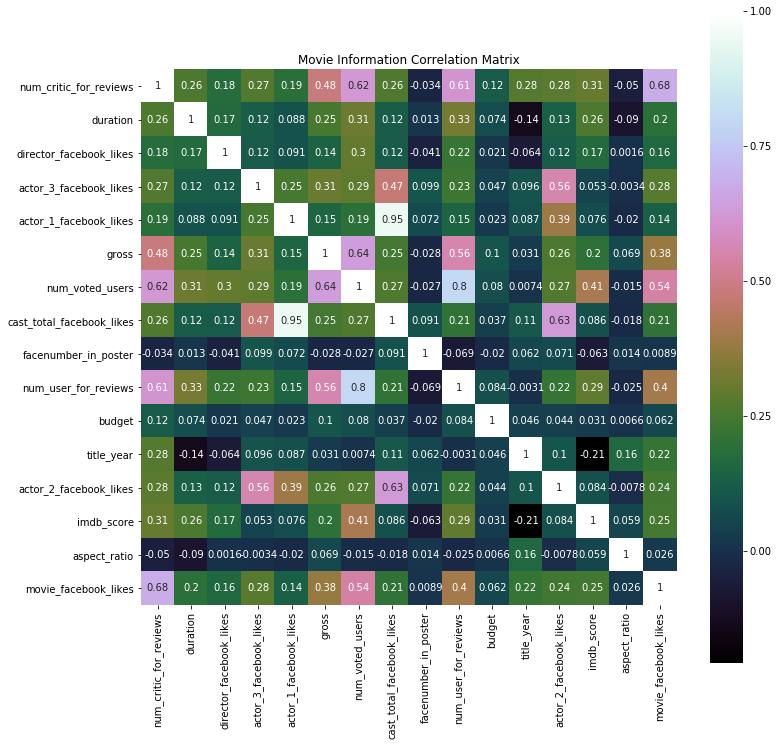

In [4]:
correlation_data = movie_data_metadata.corr()
plt.figure(figsize = (12,12))
sns.heatmap(correlation_data, vmax=1, square=True, annot=True,cmap='cubehelix')

plt.title("Movie Information Correlation Matrix")
plt.show()

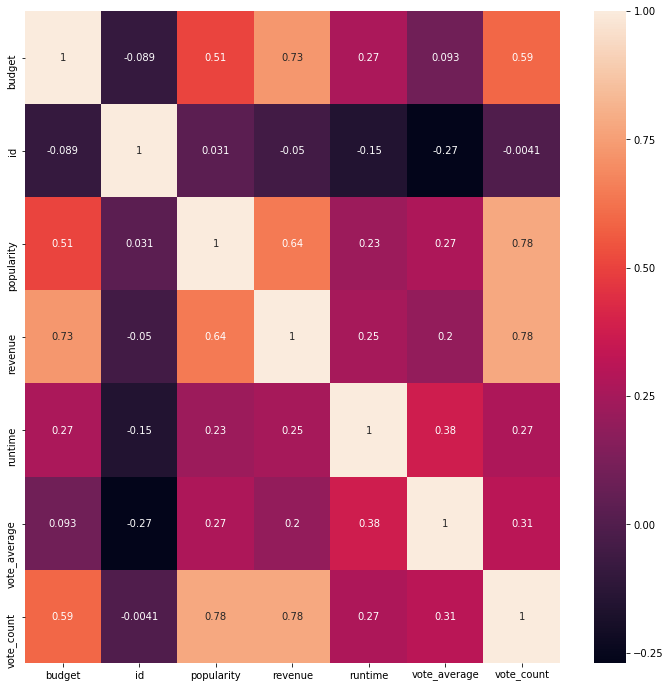

In [5]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(data=movies_data.corr(),annot=True)
plt.show()

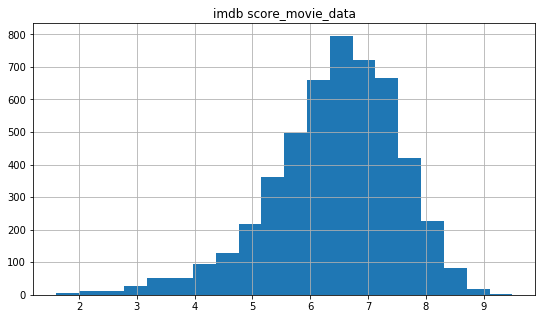

In [6]:
plt.rcParams['figure.figsize'] = (9.0, 5.0)
scores_data = pd.DataFrame({"imdb score_movie_data":movie_data_metadata["imdb_score"]})
scores_data.hist(bins=20)
plt.show()

Let's just start with some easy questions to get familiar with the data. 
So what does the data look like? We'll start with taking a look at the movies data frame.

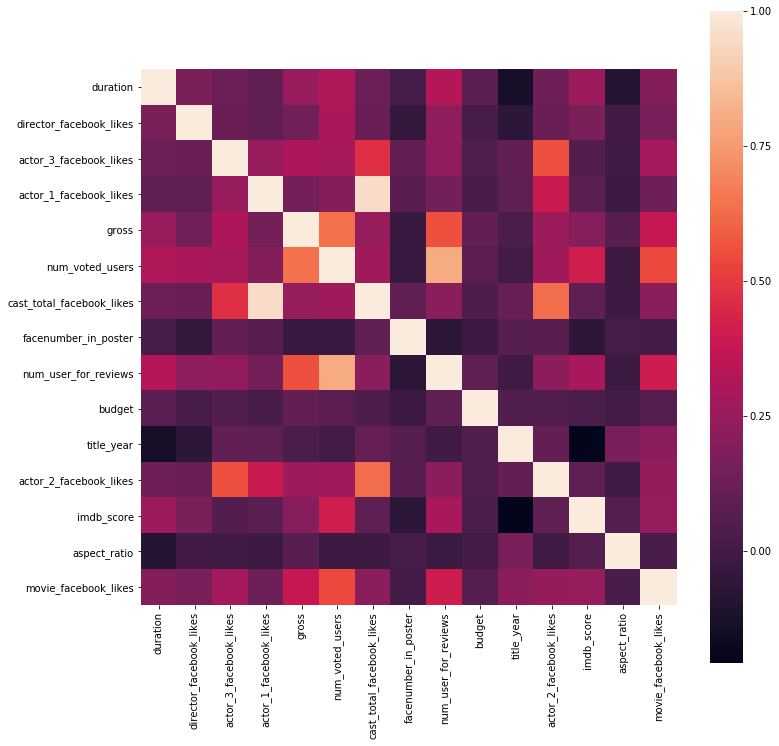

In [7]:
corr = movie_data_metadata.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

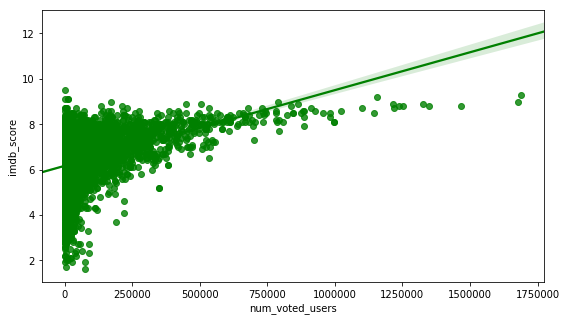

In [8]:
sns.regplot(x = 'num_voted_users', y = 'imdb_score', data = movie_data_metadata, color = 'Green')
plt.show()

In [9]:
movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [10]:
list(movies_data.columns.values)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

In [11]:
list(credits_data.columns.values)

['movie_id', 'title', 'cast', 'crew']

In [12]:
movie_data_metadata.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

The columns are a bit in an awkward order to take a fine look at the data. 
A preferable first column of this data frame, would, for example, be the title of the movie and not the movie's budget.

In [13]:
credits_data.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

In [14]:
credits_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


So this data frame has way fewer columns. The cast and crew might be interesting later on. Since this data frame contains only two extra columns, we'll try to merge it with the  movies data frame. If they are in the same order, we can just concatenate the data frames, so let's see if in both data frames every row is about the same movie:

In [15]:
(credits_data['title']==movies_data['title']).describe()

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object

This tells us that every row in the credits data base has the same movie title as the same row in the movies data base. To prevent getting duplicate columns, we'll remove the movie_id and title column from the credits data frame and concatenate them.

In [16]:
del credits_data['title']
del credits_data['movie_id']
movie_DataFrame = pd.concat([movies_data, credits_data], axis=1)

In [17]:
movie_DataFrame.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


create a new dataframe with all the columns we would be using

In [18]:
new_columns_data = ['id','title','release_date','popularity','vote_average','vote_count',
           'budget','revenue','genres','keywords','cast','crew','tagline', 'runtime', 'production_companies', 
           'production_countries', 'status']

movie_DataFrame2 = movie_DataFrame[new_columns_data]
movie_DataFrame2.head()

,id,title,release_date,popularity,vote_average,vote_count,budget,revenue,genres,keywords,cast,crew,tagline,runtime,production_companies,production_countries,status
0,19995,Avatar,2009-12-10,150.437577,7.2,11800,237000000,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Enter the World of Pandora.,162.0,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Released
1,285,Pirates of the Caribbean: At World's End,2007-05-19,139.082615,6.9,4500,300000000,961000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","At the end of the world, the adventure begins.",169.0,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Released
2,206647,Spectre,2015-10-26,107.376788,6.3,4466,245000000,880674609,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",A Plan No One Escapes,148.0,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",Released
3,49026,The Dark Knight Rises,2012-07-16,112.312950,7.6,9106,250000000,1084939099,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Legend Ends,165.0,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Released
4,49529,John Carter,2012-03-07,43.926995,6.1,2124,260000000,284139100,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","Lost in our world, found in another.",132.0,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Released


We also notice that the columns 'genres', 'keywords', 'production_companies', 'production_countries' and 'spoken_languages' are of the dictionary type, so right now they are quite hard to read, but later on we will find a way to work with them.

In [19]:
movie_DataFrame2.describe().round()

,id,popularity,vote_average,vote_count,budget,revenue,runtime
count,4803.0,4803.0,4803.0,4803.0,4803.0,4.803000e+03,4801.0
mean,57165.0,21.0,6.0,690.0,29045040.0,8.226064e+07,107.0
std,88695.0,32.0,1.0,1235.0,40722391.0,1.628571e+08,23.0
min,5.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
25%,9014.0,5.0,6.0,54.0,790000.0,0.000000e+00,94.0
50%,14629.0,13.0,6.0,235.0,15000000.0,1.917000e+07,103.0
75%,58610.0,28.0,7.0,737.0,40000000.0,9.291719e+07,118.0
max,459488.0,876.0,10.0,13752.0,380000000.0,2.787965e+09,338.0


In [20]:
my_imputer = Imputer()
temp=movie_DataFrame2
X2 = my_imputer.fit_transform(movie_DataFrame2[['runtime']])
movie_DataFrame2['runtime'] = X2
movie_DataFrame2.describe().round()

,id,popularity,vote_average,vote_count,budget,revenue,runtime
count,4803.0,4803.0,4803.0,4803.0,4803.0,4.803000e+03,4803.0
mean,57165.0,21.0,6.0,690.0,29045040.0,8.226064e+07,107.0
std,88695.0,32.0,1.0,1235.0,40722391.0,1.628571e+08,23.0
min,5.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
25%,9014.0,5.0,6.0,54.0,790000.0,0.000000e+00,94.0
50%,14629.0,13.0,6.0,235.0,15000000.0,1.917000e+07,103.0
75%,58610.0,28.0,7.0,737.0,40000000.0,9.291719e+07,118.0
max,459488.0,876.0,10.0,13752.0,380000000.0,2.787965e+09,338.0


So now at least all the numerical columns are complete. Let's take a quick look at how all the variables are distributed.

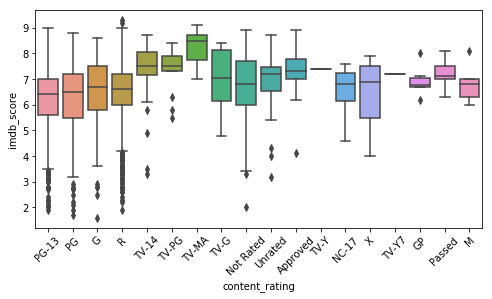

In [21]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'content_rating', y = 'imdb_score',  data = movie_data_metadata)
xt = plt.xticks(rotation=45)

In [22]:
plt.show()

In [23]:
del movie_DataFrame2['id']

In [24]:
movie_DataFrame2['vote_classes'] = pd.cut(movie_DataFrame2['vote_average'],4, labels=["low", "medium-low","medium-high","high"])

since big values are tough to plot, lets take the log values of them and then plot them

In [25]:
movie_DataFrame2['log_budget'] = np.log(movie_DataFrame2['budget'])
movie_DataFrame2['log_popularity'] = np.log(movie_DataFrame2['popularity'])
movie_DataFrame2['log_vote_average'] = np.log(movie_DataFrame2['vote_average'])
movie_DataFrame2['log_vote_count'] = np.log(movie_DataFrame2['vote_count'])
movie_DataFrame2['log_revenue']= np.log(movie_DataFrame2['revenue'])
movie_DataFrame2['log_runtime']= np.log(movie_DataFrame2['runtime'])
movie_DataFrame3=movie_DataFrame2[movie_DataFrame2.columns[-5:]]

In [26]:
movie_DataFrame3=movie_DataFrame3[movie_DataFrame3.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
movie_DataFrame3=movie_DataFrame3.dropna(axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20825f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a215c8250>]], dtype=object)

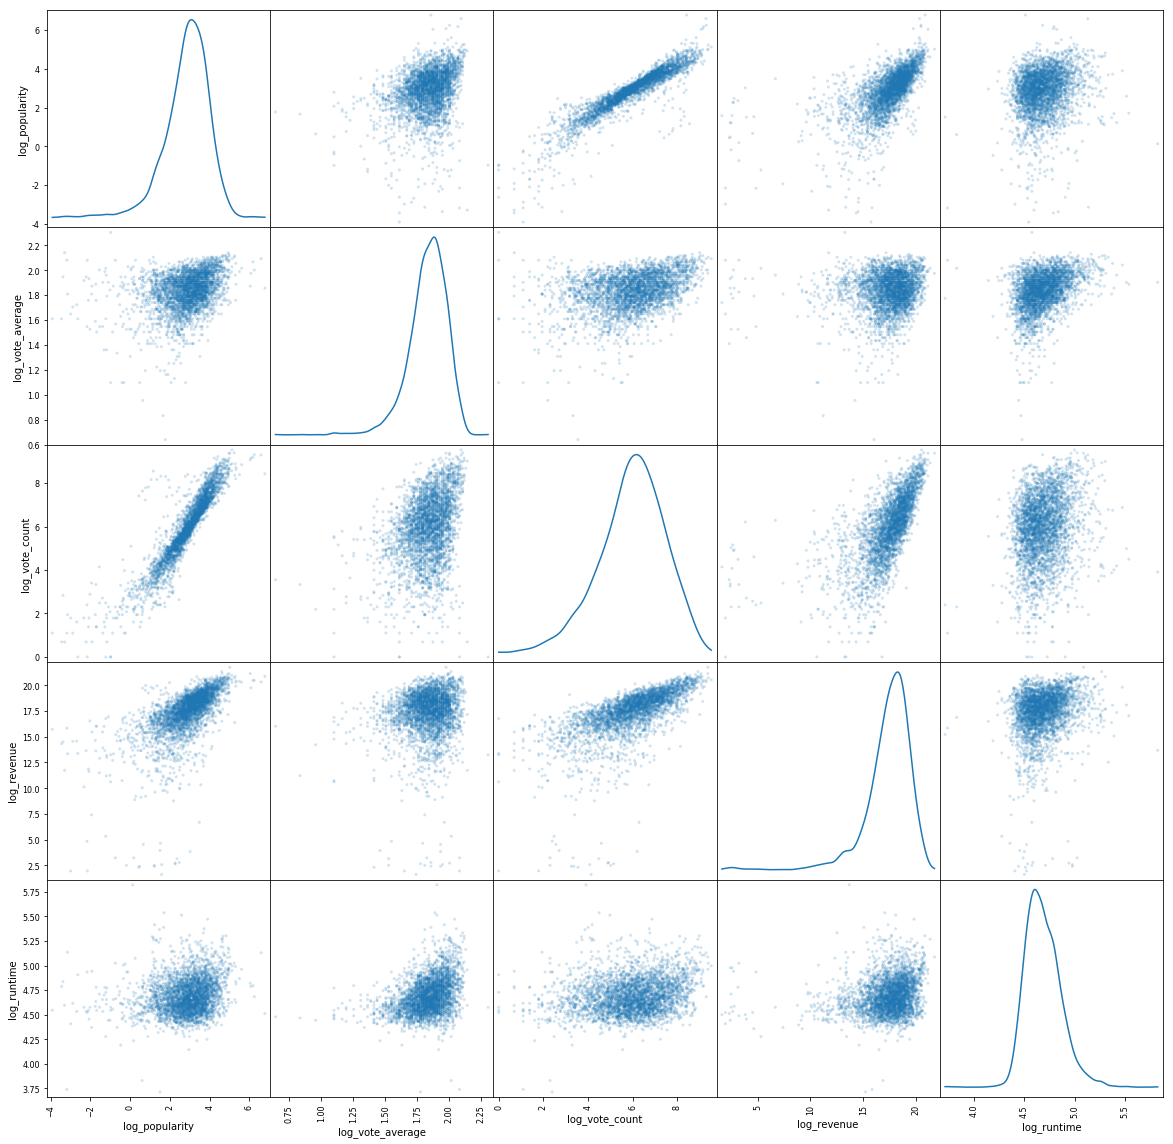

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(movie_DataFrame3,alpha=0.2, figsize=(20, 20), diagonal='kde')

In [28]:
plt.show()

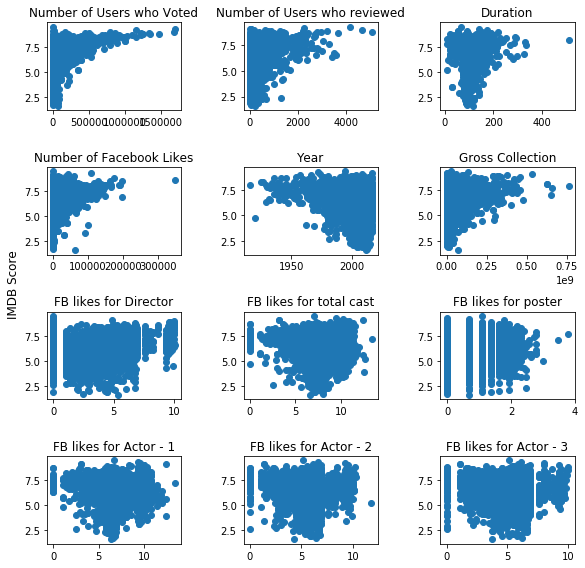

In [29]:
plt.figure(1)

f, axarr = plt.subplots(4, 3, figsize=(8, 8))
score_movie_data = movie_data_metadata.imdb_score.values

axarr[0, 0].scatter(movie_data_metadata.num_voted_users.values, score_movie_data)
axarr[0, 0].set_title('Number of Users who Voted')
axarr[0, 1].scatter(movie_data_metadata.num_user_for_reviews.values, score_movie_data)
axarr[0, 1].set_title('Number of Users who reviewed')
axarr[0, 2].scatter(movie_data_metadata.duration.values, score_movie_data)
axarr[0, 2].set_title('Duration')
axarr[1, 0].scatter(movie_data_metadata.movie_facebook_likes.values, score_movie_data)
axarr[1, 0].set_title('Number of Facebook Likes')
axarr[1, 1].scatter(movie_data_metadata.title_year.values, score_movie_data)
axarr[1, 1].set_title('Year')
axarr[1, 2].scatter(movie_data_metadata.gross.values, score_movie_data)
axarr[1, 2].set_title('Gross Collection')

axarr[2, 0].scatter(np.log1p(movie_data_metadata.director_facebook_likes.values), score_movie_data)
axarr[2, 0].set_title('FB likes for Director')
axarr[2, 1].scatter(np.log1p(movie_data_metadata.cast_total_facebook_likes.values), score_movie_data)
axarr[2, 1].set_title('FB likes for total cast')
axarr[2, 2].scatter(np.log1p(movie_data_metadata.facenumber_in_poster.values), score_movie_data)
axarr[2, 2].set_title('FB likes for poster')


axarr[3, 0].scatter(np.log1p(movie_data_metadata.actor_1_facebook_likes.values), score_movie_data)
axarr[3, 0].set_title('FB likes for Actor - 1')
axarr[3, 1].scatter(np.log1p(movie_data_metadata.actor_2_facebook_likes.values), score_movie_data)
axarr[3, 1].set_title('FB likes for Actor - 2')
axarr[3, 2].scatter(np.log1p(movie_data_metadata.actor_3_facebook_likes.values), score_movie_data)
axarr[3, 2].set_title('FB likes for Actor - 3')


f.text(-0.01, 0.5, 'IMDB Score', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()

In [30]:
plt.show()

In [31]:
Early_movie_DataFrame = movie_DataFrame2[movie_DataFrame2.columns[0:16]]

Let's take a closer look at our non-numerical variables. 
We choose to start with looking at the genres, since this variable has got the least variability, should be the most easy target for analysis.

The genres column contains variables of the string type, while they are in dictionaries. 
Moreover, the colomn is a json column. To analyse and understand the data it is necessary to change the type of the variable and filter the columns. Despite the fact that we already loaded our data for the exploration, we'll reload it here and make sure to load the json columns correctly. To do this, we made use of a few tricks found in another Kernel*

In [32]:
def load_TMDB_movie_json_data(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_TMDB_credits_json_data(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def pipeline_to_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

credits_data = load_TMDB_credits_json_data("tmdb_5000_credits.csv")
movies_data = load_TMDB_movie_json_data("tmdb_5000_movies.csv")

del credits_data['title']
df = pd.concat([movies_data, credits_data], axis=1)

df['genres'] = df['genres'].apply(pipeline_to_flatten_names)

genres_data = set()
for s in df['genres'].str.split('|'):
    genres_data = set().union(s, genres_data)
genres_data = list(genres_data)
genres_data.remove('')

In [33]:
DafaFrame_cleaned = df[['title','vote_average','release_date','runtime','budget','revenue']].reset_index(drop=True)

for genre in genres_data:
    DafaFrame_cleaned[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
DafaFrame_cleaned[:5]

DafaFrame_cleaned.head()

,title,vote_average,release_date,runtime,budget,revenue,Mystery,Crime,Drama,Animation,...,Romance,Comedy,Family,Fantasy,Horror,Thriller,Science Fiction,Western,TV Movie,Adventure
0,Avatar,7.2,2009-12-10,162.0,237000000,2787965087,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,Pirates of the Caribbean: At World's End,6.9,2007-05-19,169.0,300000000,961000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,Spectre,6.3,2015-10-26,148.0,245000000,880674609,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,The Dark Knight Rises,7.6,2012-07-16,165.0,250000000,1084939099,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,John Carter,6.1,2012-03-07,132.0,260000000,284139100,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


Successfully converted JSON type to proper formatted data ready for preprocessing and learning algorithms

In [34]:
df['genres']

0        Action|Adventure|Fantasy|Science Fiction
1                        Adventure|Fantasy|Action
2                          Action|Adventure|Crime
3                     Action|Crime|Drama|Thriller
4                Action|Adventure|Science Fiction
5                        Fantasy|Action|Adventure
6                                Animation|Family
7                Action|Adventure|Science Fiction
8                        Adventure|Fantasy|Family
9                        Action|Adventure|Fantasy
10       Adventure|Fantasy|Action|Science Fiction
11                Adventure|Action|Thriller|Crime
12                       Adventure|Fantasy|Action
13                       Action|Adventure|Western
14       Action|Adventure|Fantasy|Science Fiction
15                       Adventure|Family|Fantasy
16               Science Fiction|Action|Adventure
17                       Adventure|Action|Fantasy
18                  Action|Comedy|Science Fiction
19                       Action|Adventure|Fantasy


Let's see which genre's contribute more to the industry

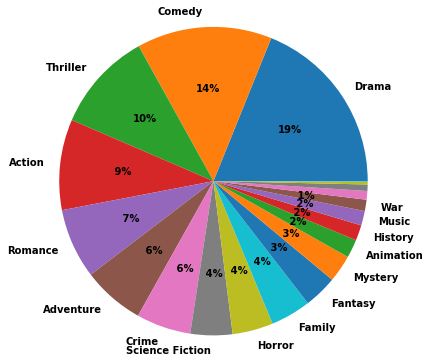

In [35]:
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5,5))
genre_data_count = []
for genre in genres_data:
    genre_data_count.append([genre, DafaFrame_cleaned[genre].values.sum()])
genre_data_count.sort(key = lambda x:x[1], reverse = True)
labels_ForGenre, sizes_ForGenre = zip(*genre_data_count)
labels_selected = [n if v > sum(sizes_ForGenre) * 0.01 else '' for n, v in genre_data_count]
ax.pie(sizes_ForGenre, labels=labels_selected,
      autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',
      shadow = False, startangle=0)
ax.axis('equal')
plt.tight_layout()

This pie chart shows which genres are most common in the movies dataset.
We find that drama movies are most common, followed by comedy. 
Afterwards, thriller and action movies are the most popular. Interestingly, half of the movies is from the top 5 genres. (51%). 
This suggest that the main genre of the most movies are drama, comedy, thriller, action. 
However, the top 5 most common genres could be seen as more general descriptions. 

Now let's try to get a more in depth view of the genres. 
In this cell we calculate the average votes, budget, and revenue for the different genres. we create a new data frame consisiting of every genre and the calculated averages. 

In [36]:
plt.show()

In [37]:
movie_data_metadata['diff_gross'] = movie_data_metadata['gross'] - movie_data_metadata['budget']
movie_data_metadata_copy_DropNA = movie_data_metadata.copy().dropna()

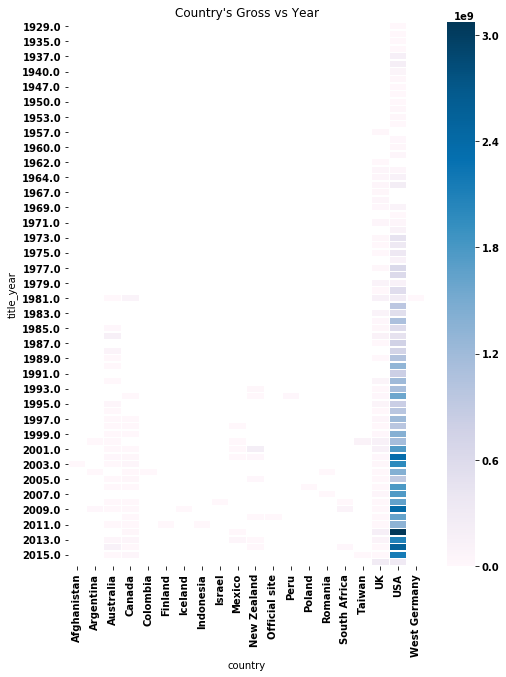

In [38]:
gross_DataBy_country = movie_data_metadata_copy_DropNA.groupby(movie_data_metadata['country'])['diff_gross'].sum().sort_values(ascending=False)
gross_DataBy_country_index = gross_DataBy_country[:20].index

gross_DataBy_country_pivot = pd.pivot_table(data = movie_data_metadata_copy_DropNA[movie_data_metadata_copy_DropNA['country'].isin(gross_DataBy_country_index)],
                               index=['title_year'],
                               columns=['country'],
                               values=['diff_gross'],
                               aggfunc='sum')
fig,ax = plt.subplots(figsize=(8,10))
sns.heatmap(gross_DataBy_country_pivot['diff_gross'],vmin=0,linewidth=.5,annot=False,cmap='PuBu',ax=ax)
plt.title('Country\'s Gross vs Year')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
del fig,ax,ticks

In [39]:
plt.show()

In [40]:
data_mean_per_genre = pd.DataFrame(genres_data)

By votes, budget, revenue

In [41]:
#Mean votes average
new_array_genre_data = []*len(genres_data)
for genre in genres_data:
    new_array_genre_data.append(DafaFrame_cleaned.groupby(genre, as_index=True)['vote_average'].mean())
new_array_genre_data2 = []*len(genres_data)
for i in range(len(genres_data)):
    new_array_genre_data2.append(new_array_genre_data[i][1])

data_mean_per_genre['mean_votes_average']=new_array_genre_data2

#Mean budget
new_array_genre_data = []*len(genres_data)
for genre in genres_data:
    new_array_genre_data.append(DafaFrame_cleaned.groupby(genre, as_index=True)['budget'].mean())
new_array_genre_data2 = []*len(genres_data)
for i in range(len(genres_data)):
    new_array_genre_data2.append(new_array_genre_data[i][1])

data_mean_per_genre['mean_budget']=new_array_genre_data2

#Mean revenue 
new_array_genre_data = []*len(genres_data)
for genre in genres_data:
    new_array_genre_data.append(DafaFrame_cleaned.groupby(genre, as_index=True)['revenue'].mean())
new_array_genre_data2 = []*len(genres_data)
for i in range(len(genres_data)):
    new_array_genre_data2.append(new_array_genre_data[i][1])

data_mean_per_genre['mean_revenue']=new_array_genre_data2

data_mean_per_genre['profit'] = data_mean_per_genre['mean_revenue']-data_mean_per_genre['mean_budget']

data_mean_per_genre  

,0,mean_votes_average,mean_budget,mean_revenue,profit
0,Mystery,6.183908,3.074449e+07,7.830093e+07,4.755644e+07
1,Crime,6.274138,2.784981e+07,6.615066e+07,3.830085e+07
2,Drama,6.388594,2.067832e+07,5.211623e+07,3.143791e+07
3,Animation,6.341453,6.646590e+07,2.256930e+08,1.592271e+08
4,Music,6.355676,1.590795e+07,4.845595e+07,3.254800e+07
5,Action,5.989515,5.151075e+07,1.412131e+08,8.970235e+07
6,Foreign,6.352941,6.580884e+05,3.646515e+05,-2.934369e+05
7,Documentary,6.238182,2.653288e+06,9.838888e+06,7.185600e+06
8,War,6.713889,3.528246e+07,8.415587e+07,4.887342e+07
9,History,6.719797,2.990347e+07,5.752356e+07,2.762010e+07


In [42]:
data_mean_per_genre.sort_values('mean_votes_average', ascending=False).head()

,0,mean_votes_average,mean_budget,mean_revenue,profit
9,History,6.719797,2.990347e+07,5.752356e+07,2.762010e+07
8,War,6.713889,3.528246e+07,8.415587e+07,4.887342e+07
2,Drama,6.388594,2.067832e+07,5.211623e+07,3.143791e+07
4,Music,6.355676,1.590795e+07,4.845595e+07,3.254800e+07
6,Foreign,6.352941,6.580884e+05,3.646515e+05,-2.934369e+05


In [43]:
data_mean_per_genre.sort_values('mean_budget', ascending=False).head()

,0,mean_votes_average,mean_budget,mean_revenue,profit
3,Animation,6.341453,6.646590e+07,2.256930e+08,1.592271e+08
19,Adventure,6.156962,6.632686e+07,2.086602e+08,1.423333e+08
13,Fantasy,6.096698,6.356061e+07,1.933542e+08,1.297936e+08
16,Science Fiction,6.005607,5.186555e+07,1.524565e+08,1.005910e+08
5,Action,5.989515,5.151075e+07,1.412131e+08,8.970235e+07


It's very interesting to see that the top 5 highest vote average consists of *History, War, Drama, Music* and *Foreign*, while none of these genres are in either one of the other three categories, which all have the same top 3: *Animation, Adventure, Fantasy*. 
On the one hand, this is easily explained, since budget and revenue should be closely elated and profit is directly derived from budget and revenue. However, we would have expected a higher correlation between the budget and the quality of a movie.

To go even more in depth, we want to analyse the averages per genre per year.  
Therefore, we first extend the dataframe with the year of release per movie.  
Afterwards, we create a new dataframe which contains the average votes, average runtime, and average budget per release year and per genre. 

In the last step in the cell below, only the rows that contain a 1 for genre are kept, so we create a data frame with only the specific genres. 

In [44]:
from datetime import datetime

t = DafaFrame_cleaned['release_date']
t = pd.to_datetime(t)
t = t.dt.year
DafaFrame_cleaned['release_year'] = t

df_list = []*len(genres_data)
for genre in genres_data:
    df_list.append(DafaFrame_cleaned.groupby([genre,'release_year']).mean().reset_index())

df_per_genre = []*len(genres_data)
for i in range(len(df_list)):
    df_per_genre.append(df_list[i][df_list[i].ix[:,0] == 1])

create a new table with the cloumns 1988 till 2017

In [45]:
# Budget
columns = range(1988,2018)
data_budget_genre = pd.DataFrame( columns = columns)

for genre in genres_data:
    temp=(df_per_genre[genres_data.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'budget', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    data_budget_genre.loc[genres_data.index(genre)]=temp
data_budget_genre['genre']=genres_data

# Revenue 

columns = range(1988,2018)
data_revenue_genre = pd.DataFrame( columns = columns)

for genre in genres_data:
    temp=(df_per_genre[genres_data.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'revenue', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    data_revenue_genre.loc[genres_data.index(genre)]=temp
data_revenue_genre['genre']=genres_data

# Vote average 
columns = range(1988,2018)
vote_avg_genre = pd.DataFrame( columns = columns)

for genre in genres_data:
    temp=(df_per_genre[genres_data.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'vote_average', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    vote_avg_genre.loc[genres_data.index(genre)]=temp
vote_avg_genre['genre']=genres_data

### Budget per genre per year:


In [46]:
data_budget_genre.index = data_budget_genre['genre']
data_budget_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
genre,,,,,,,,,,,,,,,,,,,,,
Mystery,NaN,1.900000e+07,3.550000e+07,NaN,1.250000e+07,4.366667e+07,2.580000e+07,3.875000e+07,4.750000e+07,3.801500e+07,...,2.591924e+07,3.507574e+07,4.256688e+07,2.800000e+07,4.270000e+07,2.789267e+07,2.315000e+07,2.425000e+07,NaN,Mystery
Crime,1.282500e+07,2.300000e+07,4.375000e+07,1.641667e+07,1.523869e+07,2.187500e+07,2.776923e+07,2.631250e+07,2.217647e+07,3.463487e+07,...,2.304330e+07,2.426559e+07,3.657083e+07,3.061967e+07,3.291946e+07,2.157185e+07,3.630000e+07,4.017500e+07,NaN,Crime
Drama,7.441667e+06,1.237273e+07,1.922250e+07,1.934615e+07,2.024658e+07,1.556923e+07,2.572500e+07,2.478649e+07,2.769933e+07,2.724868e+07,...,1.760139e+07,2.050320e+07,2.064913e+07,2.686389e+07,2.176040e+07,2.139409e+07,2.271263e+07,2.543919e+07,0.0,Drama
Animation,1.015000e+07,NaN,NaN,NaN,2.800000e+07,2.800000e+07,4.500000e+07,4.250000e+07,4.800000e+07,3.716667e+07,...,7.900000e+07,9.184615e+07,8.717647e+07,8.334743e+07,7.844118e+07,6.464286e+07,7.092308e+07,7.800000e+07,NaN,Animation
Music,NaN,NaN,NaN,3.800000e+07,2.250000e+07,9.500000e+06,NaN,0.000000e+00,2.325000e+07,2.850000e+07,...,3.472727e+07,5.000000e+06,3.040000e+07,3.028571e+07,1.295835e+07,1.188890e+07,1.146530e+07,0.000000e+00,NaN,Music
Action,1.707143e+07,2.945455e+07,3.837500e+07,2.890909e+07,3.146889e+07,2.241765e+07,3.266667e+07,5.106000e+07,5.168182e+07,5.453289e+07,...,5.524081e+07,6.367449e+07,5.885432e+07,8.099373e+07,7.233679e+07,7.582593e+07,6.637717e+07,7.152538e+07,NaN,Action
Foreign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.250000e+06,...,8.125018e+05,0.000000e+00,0.000000e+00,2.250000e+05,NaN,NaN,NaN,NaN,NaN,Foreign
Documentary,NaN,1.600000e+05,NaN,NaN,NaN,NaN,7.000000e+05,NaN,NaN,0.000000e+00,...,1.600000e+07,4.285714e+06,3.850857e+06,1.858333e+06,1.260000e+06,1.304429e+05,6.746231e+05,NaN,NaN,Documentary
War,6.300000e+07,1.366667e+07,NaN,NaN,4.000000e+07,1.100000e+07,3.500000e+07,3.566667e+07,3.650000e+07,NaN,...,3.300000e+07,2.505785e+07,3.985000e+07,3.500000e+07,1.666667e+07,4.860000e+07,3.000000e+07,3.333333e+07,NaN,War


### Budget per genre per year:


In [47]:
data_revenue_genre.index = data_revenue_genre['genre']
data_revenue_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
genre,,,,,,,,,,,,,,,,,,,,,
Mystery,NaN,1.108795e+08,2.627117e+08,NaN,1.072523e+07,2.781307e+08,9.138758e+07,1.499534e+08,1.062594e+08,6.935287e+07,...,6.984452e+07,1.020497e+08,1.169212e+08,7.414954e+07,8.405029e+07,7.715577e+07,3.866913e+07,9.781144e+07,NaN,Mystery
Crime,2.593798e+07,5.225724e+07,7.694114e+07,1.049300e+08,8.962918e+07,7.733952e+07,1.219430e+08,7.811012e+07,4.683539e+07,6.534840e+07,...,4.865874e+07,4.074380e+07,9.365526e+07,9.149609e+07,6.650704e+07,4.022622e+07,7.479586e+07,1.388020e+08,NaN,Crime
Drama,6.138733e+07,7.646573e+07,1.279218e+08,5.803509e+07,9.141593e+07,7.285734e+07,1.356206e+08,7.533243e+07,5.836057e+07,7.358007e+07,...,3.956652e+07,4.772357e+07,4.533169e+07,9.538976e+07,5.452071e+07,5.674699e+07,7.293462e+07,6.068936e+07,0.0,Drama
Animation,4.250701e+07,NaN,NaN,NaN,5.040502e+08,6.692760e+05,7.882418e+08,3.598169e+08,8.758471e+07,1.009154e+08,...,2.433655e+08,3.199310e+08,2.466578e+08,2.754644e+08,3.010980e+08,2.201954e+08,3.140907e+08,4.719153e+08,NaN,Animation
Music,NaN,NaN,NaN,3.441689e+07,2.663520e+08,1.059997e+06,NaN,1.062700e+08,3.526179e+07,5.178332e+07,...,8.765727e+07,1.763818e+06,1.249970e+08,1.163449e+08,1.223540e+07,3.468455e+07,7.920151e+07,0.000000e+00,NaN,Music
Action,6.098073e+07,1.220110e+08,1.163004e+08,7.159942e+07,1.594277e+08,5.637173e+07,8.832568e+07,1.178188e+08,1.633356e+08,1.053358e+08,...,1.717490e+08,1.371655e+08,1.621480e+08,2.529830e+08,1.718815e+08,2.575422e+08,2.364232e+08,2.108906e+08,NaN,Action
Foreign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,1.750000e+00,0.000000e+00,0.000000e+00,1.113000e+05,NaN,NaN,NaN,NaN,NaN,Foreign
Documentary,NaN,6.706368e+06,NaN,NaN,NaN,NaN,7.830611e+06,NaN,NaN,0.000000e+00,...,7.368583e+06,1.846765e+07,1.682173e+07,7.503113e+06,3.223091e+06,0.000000e+00,0.000000e+00,NaN,NaN,Documentary
War,1.890156e+08,6.261002e+07,NaN,NaN,7.550586e+07,1.731828e+08,9.248560e+07,7.500000e+07,1.664186e+08,NaN,...,1.104578e+08,3.907929e+07,4.650904e+07,6.581907e+07,4.976520e+07,1.874737e+08,5.321016e+07,3.148244e+07,NaN,War


### Vote Average per genre per year:


In [48]:
vote_avg_genre.index = vote_avg_genre['genre']
vote_avg_genre

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
genre,,,,,,,,,,,,,,,,,,,,,
Mystery,NaN,6.700000,6.550000,NaN,7.500000,6.700000,6.320000,5.975000,6.316667,6.705556,...,6.107143,6.329412,6.212500,5.737500,6.240000,5.440000,5.505000,6.466667,NaN,Mystery
Crime,6.350000,6.166667,6.850000,6.683333,6.490909,6.487500,6.338462,6.300000,6.305882,6.387500,...,6.021875,6.123333,6.295833,5.955556,6.183784,5.762963,5.419231,5.550000,NaN,Crime
Drama,6.408333,6.881818,6.920000,6.446154,6.753846,6.911538,6.770000,6.564865,6.249123,6.550943,...,6.300000,6.193043,6.273737,6.256962,6.364545,5.930909,5.993684,6.013514,7.4,Drama
Animation,7.400000,NaN,NaN,NaN,7.400000,6.800000,8.000000,7.200000,6.200000,7.566667,...,6.480000,6.300000,5.882353,6.176923,6.323529,6.078571,6.476923,6.025000,NaN,Animation
Music,NaN,NaN,NaN,6.700000,6.300000,6.250000,NaN,6.900000,6.450000,5.900000,...,5.818182,5.100000,5.560000,6.585714,6.675000,6.244444,5.687500,6.000000,NaN,Music
Action,6.385714,6.400000,6.500000,5.927273,6.300000,6.247059,5.828571,5.992000,5.904545,5.700000,...,5.894118,6.038776,5.968966,5.879070,6.044643,5.857407,5.684783,5.866667,NaN,Action
Foreign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.300000,...,6.350000,5.200000,5.750000,6.900000,NaN,NaN,NaN,NaN,NaN,Foreign
Documentary,NaN,7.400000,NaN,NaN,NaN,NaN,7.700000,NaN,NaN,6.300000,...,6.540000,6.142857,5.785714,6.711111,6.400000,3.528571,3.542857,NaN,NaN,Documentary
War,5.700000,7.166667,NaN,NaN,7.100000,7.450000,6.550000,7.100000,6.600000,NaN,...,7.050000,6.900000,6.200000,6.100000,5.766667,6.790000,7.250000,6.466667,NaN,War


In [49]:
data_profit_genre = data_revenue_genre[data_revenue_genre.columns[0:29]]-data_budget_genre[data_budget_genre.columns[0:29]]

### Budget

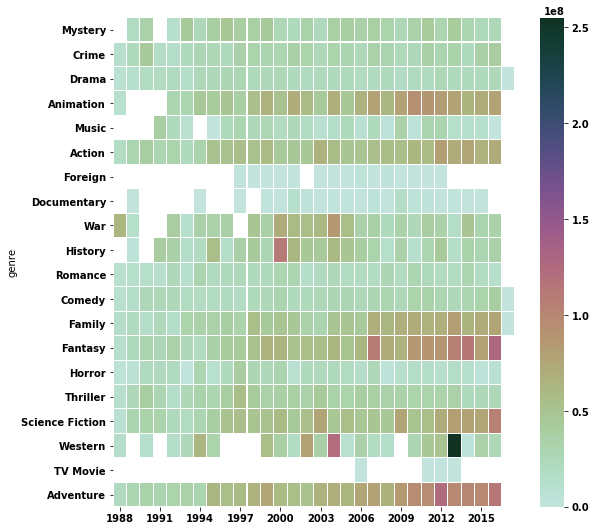

In [50]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(data_budget_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

In [51]:
plt.show()

### Revenue

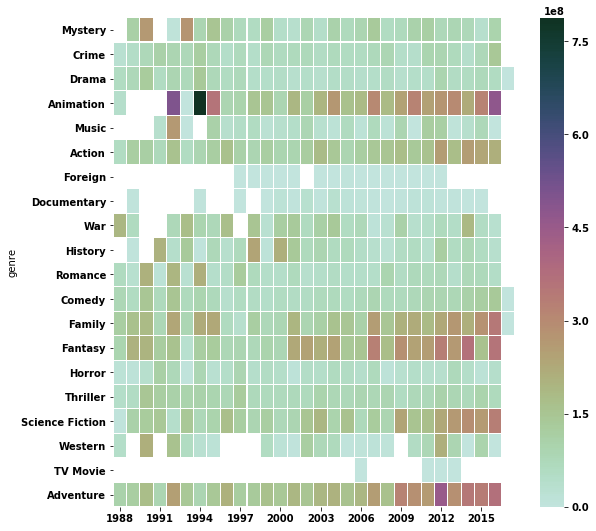

In [52]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(data_revenue_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

In [53]:
plt.show()

### Profit

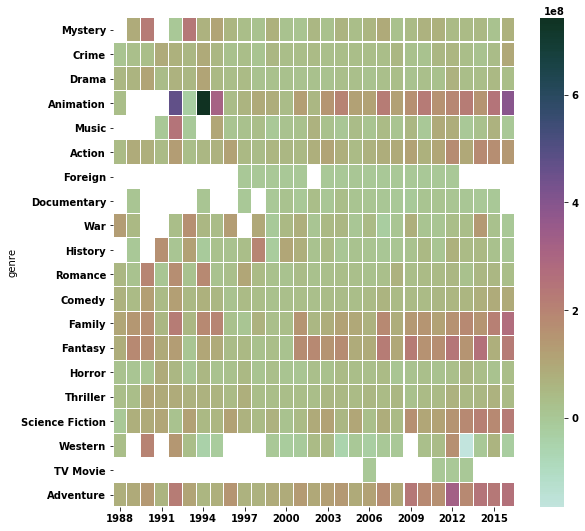

In [54]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(data_profit_genre, xticklabels=3, cmap=cmap, linewidths=0.05)

In [55]:
plt.show()

### Vote Average

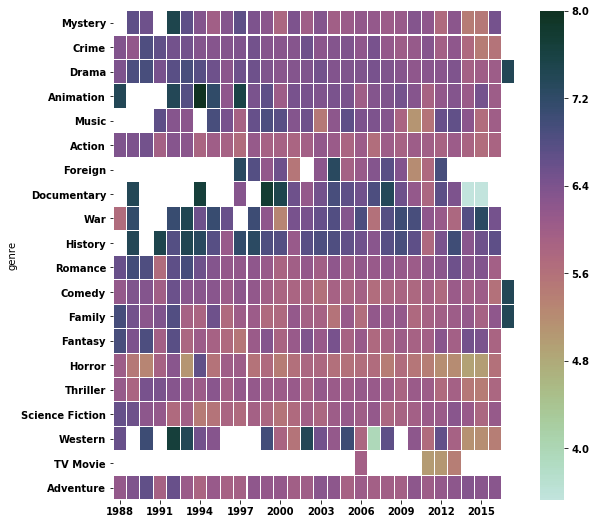

In [56]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(vote_avg_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

In [57]:
plt.show()

In [58]:
temp = data_budget_genre
temp[2013]=temp[2013].replace(2.550000e+08, 0)

Budget

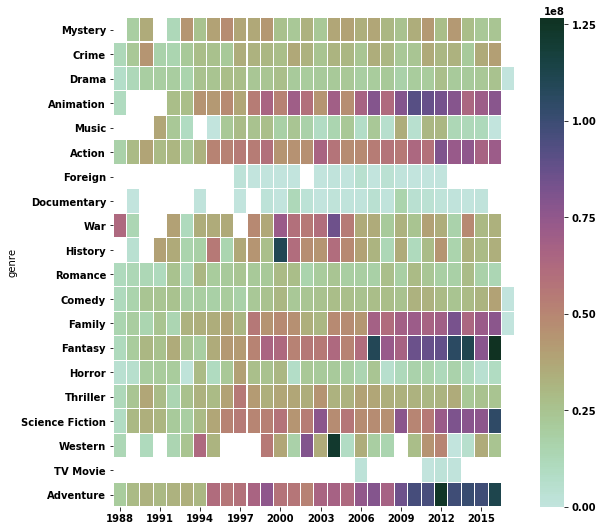

In [59]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(temp.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

In [60]:
plt.show()

In [61]:
data_revenue_genre[1994]
temp2 = data_revenue_genre
temp2[1994] = temp2[1994].replace(788241776.0, 0)
temp2[1992] = temp2[1992].replace(504050219.0, 0)
temp2

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,genre
genre,,,,,,,,,,,,,,,,,,,,,
Mystery,NaN,1.108795e+08,2.627117e+08,NaN,1.072523e+07,2.781307e+08,9.138758e+07,1.499534e+08,1.062594e+08,6.935287e+07,...,6.984452e+07,1.020497e+08,1.169212e+08,7.414954e+07,8.405029e+07,7.715577e+07,3.866913e+07,9.781144e+07,NaN,Mystery
Crime,2.593798e+07,5.225724e+07,7.694114e+07,1.049300e+08,8.962918e+07,7.733952e+07,1.219430e+08,7.811012e+07,4.683539e+07,6.534840e+07,...,4.865874e+07,4.074380e+07,9.365526e+07,9.149609e+07,6.650704e+07,4.022622e+07,7.479586e+07,1.388020e+08,NaN,Crime
Drama,6.138733e+07,7.646573e+07,1.279218e+08,5.803509e+07,9.141593e+07,7.285734e+07,1.356206e+08,7.533243e+07,5.836057e+07,7.358007e+07,...,3.956652e+07,4.772357e+07,4.533169e+07,9.538976e+07,5.452071e+07,5.674699e+07,7.293462e+07,6.068936e+07,0.0,Drama
Animation,4.250701e+07,NaN,NaN,NaN,0.000000e+00,6.692760e+05,0.000000e+00,3.598169e+08,8.758471e+07,1.009154e+08,...,2.433655e+08,3.199310e+08,2.466578e+08,2.754644e+08,3.010980e+08,2.201954e+08,3.140907e+08,4.719153e+08,NaN,Animation
Music,NaN,NaN,NaN,3.441689e+07,2.663520e+08,1.059997e+06,NaN,1.062700e+08,3.526179e+07,5.178332e+07,...,8.765727e+07,1.763818e+06,1.249970e+08,1.163449e+08,1.223540e+07,3.468455e+07,7.920151e+07,0.000000e+00,NaN,Music
Action,6.098073e+07,1.220110e+08,1.163004e+08,7.159942e+07,1.594277e+08,5.637173e+07,8.832568e+07,1.178188e+08,1.633356e+08,1.053358e+08,...,1.717490e+08,1.371655e+08,1.621480e+08,2.529830e+08,1.718815e+08,2.575422e+08,2.364232e+08,2.108906e+08,NaN,Action
Foreign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,1.750000e+00,0.000000e+00,0.000000e+00,1.113000e+05,NaN,NaN,NaN,NaN,NaN,Foreign
Documentary,NaN,6.706368e+06,NaN,NaN,NaN,NaN,7.830611e+06,NaN,NaN,0.000000e+00,...,7.368583e+06,1.846765e+07,1.682173e+07,7.503113e+06,3.223091e+06,0.000000e+00,0.000000e+00,NaN,NaN,Documentary
War,1.890156e+08,6.261002e+07,NaN,NaN,7.550586e+07,1.731828e+08,9.248560e+07,7.500000e+07,1.664186e+08,NaN,...,1.104578e+08,3.907929e+07,4.650904e+07,6.581907e+07,4.976520e+07,1.874737e+08,5.321016e+07,3.148244e+07,NaN,War


In [62]:
temp2[1992][9]

41225254.666666664

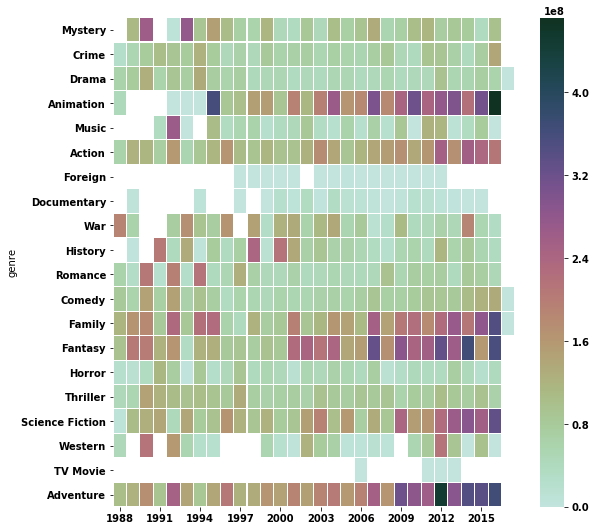

In [63]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(temp2.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

In [64]:
plt.show()

In [65]:
from datetime import datetime

data__DataFrame_genre = pd.DataFrame(columns = ['genre', 'cgenres', 'budget', 'gross', 'year'])
#list(map(datetime.year, DafaFrame_cleaned["release_date"]))
t = df['release_date']
t = pd.to_datetime(t)
t = t.dt.year
data__DataFrame_genre['release_year'] = t

colnames = ['budget', 'genres', 'revenue']
data__DataFrame_clean = df[colnames]
data__DataFrame_clean['release_year'] = t
data__DataFrame_clean = data__DataFrame_clean.dropna()
data__DataFrame_genre = data__DataFrame_genre.dropna()
data__DataFrame_clean.head()

,budget,genres,revenue,release_year
0,237000000,Action|Adventure|Fantasy|Science Fiction,2787965087,2009.0
1,300000000,Adventure|Fantasy|Action,961000000,2007.0
2,245000000,Action|Adventure|Crime,880674609,2015.0
3,250000000,Action|Crime|Drama|Thriller,1084939099,2012.0
4,260000000,Action|Adventure|Science Fiction,284139100,2012.0


In [66]:
def clean_genre_and_re_map(row):
    global data__DataFrame_genre
    d = {}
    data_genres = np.array(row['genres'].split('|'))
    n = data_genres.size
    d['budget'] = [row['budget']]*n
    d['revenue'] = [row['revenue']]*n
    d['year'] = [row['release_year']]*n
    d['genre'], d['cgenres'] = [], []
    for genre in data_genres:
        d['genre'].append(genre)
        d['cgenres'].append(data_genres[data_genres != genre])
    data__DataFrame_genre = data__DataFrame_genre.append(pd.DataFrame(d), ignore_index = True)

data__DataFrame_clean.apply(clean_genre_and_re_map, axis = 1)
data__DataFrame_genre['year'] = data__DataFrame_genre['year'].astype(np.int16)
data__DataFrame_genre = data__DataFrame_genre[['genre', 'budget', 'gross', 'year', 'cgenres']]

In [67]:
dict_genres = {}
def connect(row):
    global dict_genres
    genre = row['genre']
    cgenres = row['cgenres']
    if genre not in dict_genres:
        d_cgenres = dict(zip(cgenres, [1]*len(cgenres)))
        dict_genres[genre] = d_cgenres
    else:
        for cgenre in cgenres:
            if cgenre not in dict_genres[genre]:
                dict_genres[genre][cgenre] = 1
            else:
                dict_genres[genre][cgenre] += 1
                
data__DataFrame_genre.apply(connect, axis = 1)
list_genres = list(dict_genres.keys())
list_genres.sort()

cmax = 0
for key in dict_genres:
    for e in dict_genres[key]:
        if dict_genres[key][e] > cmax:
            cmax = dict_genres[key][e]


"\n#########################\n# visualize connections #\n#########################\nfrom matplotlib.path import Path\nimport matplotlib.patches as patches\nfrom matplotlib import cm\ncolor = cm.get_cmap('rainbow')\nf, ax = plt.subplots(figsize = (7, 9))\n\ncodes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]\n\nX, Y = 1, 1\nwmin, wmax = 1, 32\namin, amax = 0.1, 0.25\ngetPy = lambda x: Y*(1 - x/len(list_genres))\nfor i, genre in enumerate(list_genres):\n    yo = getPy(i)\n    ax.text(0, yo, genre, ha = 'right')\n    ax.text(X, yo, genre, ha = 'left')\n    for cgenre in dict_genres[genre]:\n        yi = getPy(list_genres.index(cgenre))\n        verts = [(0.0, yo), (X/4, yo), (2*X/4, yi), (X, yi)]\n        path = Path(verts, codes)\n        r, g, b, a = color(i/len(list_genres))\n        width = wmin + wmax*dict_genres[genre][cgenre]/cmax\n        alpha = amin + amax*(1 - dict_genres[genre][cgenre]/cmax)\n        patch = patches.PathPatch(path, facecolor = 'none', edgecolor = (r, 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

Let's breakdown the movies_metadata csv file

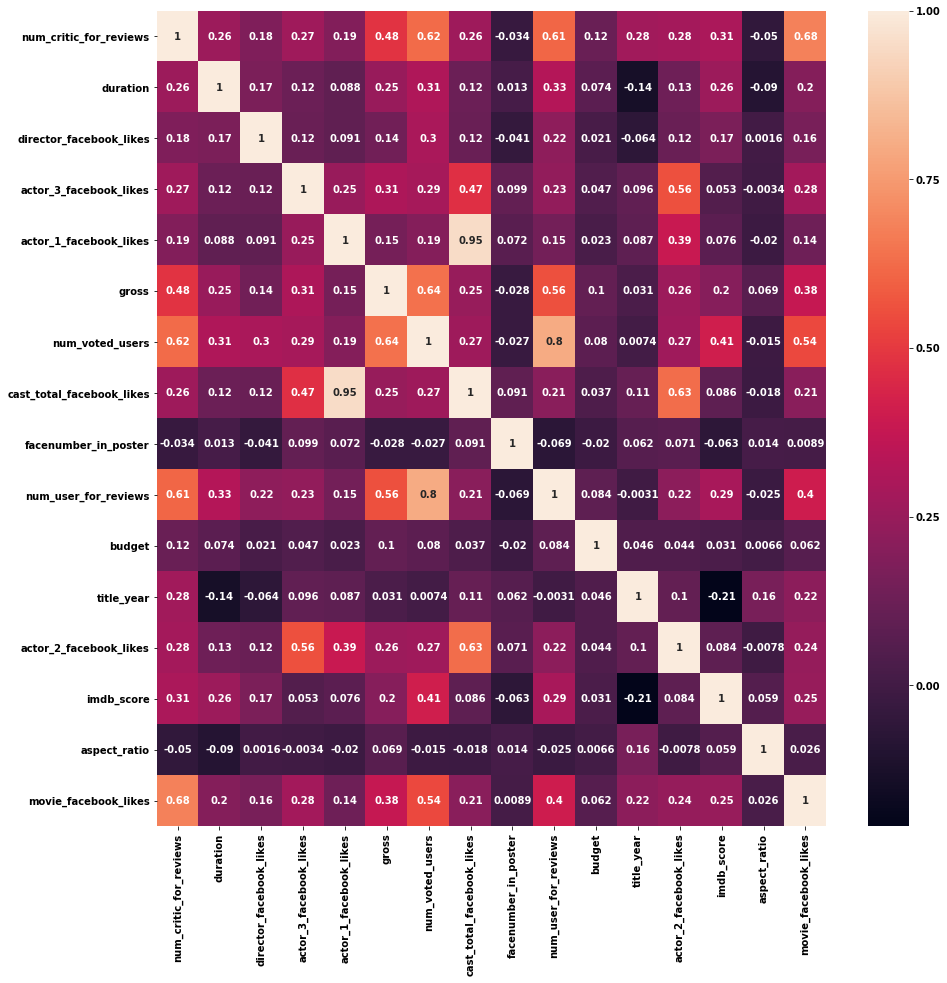

In [69]:
data_new = pd.read_csv('movie_metadata.csv')
DataFrame_new =data_new.drop(['gross','budget'],axis=1).dropna(axis=0)
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data=data_new.corr(),annot=True)

In [70]:
plt.show()

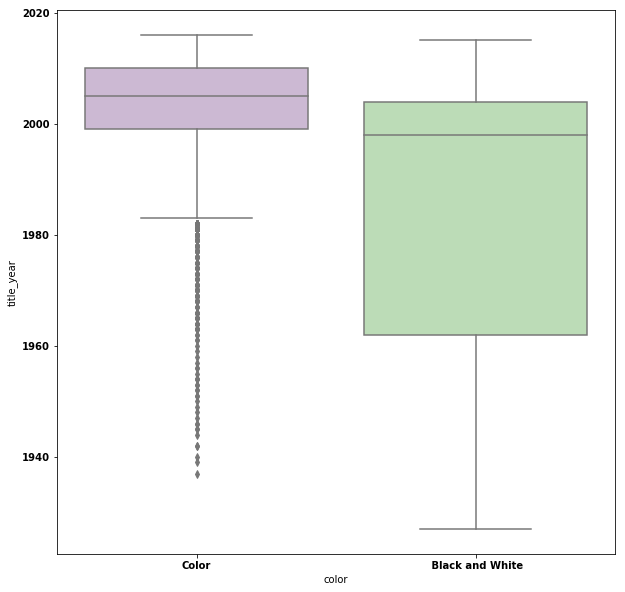

In [71]:
DataFrame_new = pd.concat([DataFrame_new,data_new.loc[DataFrame_new.index,['gross','budget']]],axis=1)
DataFrame_new.reset_index(drop=True,inplace=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="color", y="title_year", data=DataFrame_new, palette="PRGn")

In [72]:
plt.show()

In [73]:
metadata_cut = pd.cut(DataFrame_new.imdb_score, bins=list(np.arange(1,11)))

metadata_cut2 = pd.cut(DataFrame_new.title_year, bins=list(5*(np.arange(380,405))))

metadata_cut3 = pd.cut(DataFrame_new.imdb_score, bins=list([0,4,6,7,8,10]))
DataFrame_new['imdb_score_bin'] =metadata_cut

DataFrame_new['year_range'] =metadata_cut2
DataFrame_new['pc_imdb'] = metadata_cut3

In [74]:
label_encoder_metadata = LabelEncoder()
DataFrame_new['pc_imdb']= label_encoder_metadata.fit_transform(DataFrame_new['pc_imdb'])

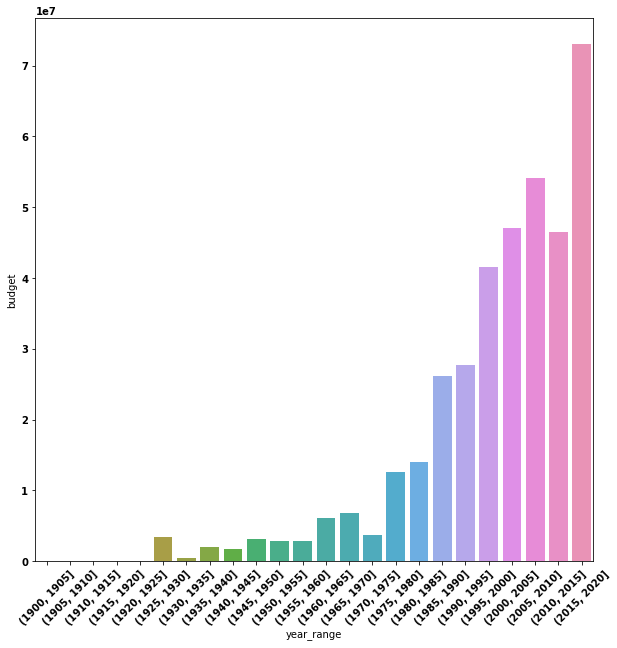

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(DataFrame_new['year_range'],DataFrame_new['budget'],ci=None)
sns.barplot(DataFrame_new['year_range'],DataFrame_new['budget'],ci=None)

In [76]:
plt.show()

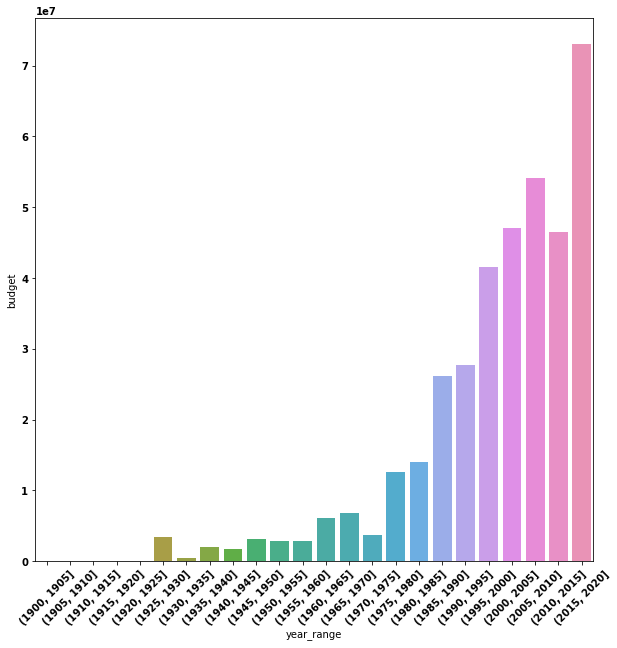

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(DataFrame_new['year_range'],DataFrame_new['budget'],ci=None)

In [78]:
plt.show()

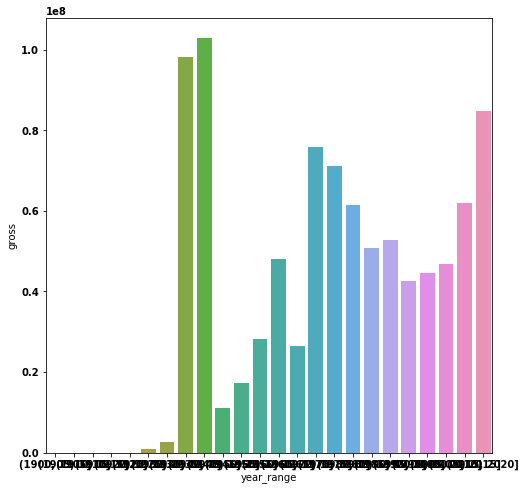

In [79]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(DataFrame_new['year_range'],DataFrame_new['gross'],ci=None)

In [80]:
plt.show()

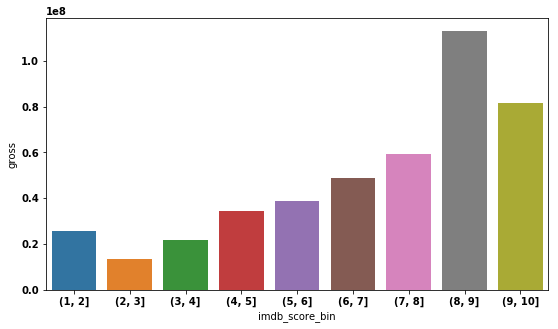

In [81]:
sns.barplot(DataFrame_new['imdb_score_bin'],DataFrame_new['gross'],ci=None)

In [82]:
plt.show()

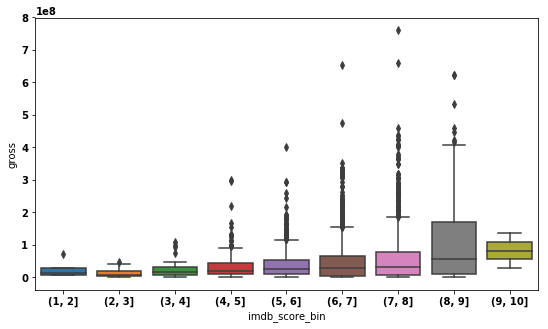

In [83]:
sns.boxplot(data=DataFrame_new,x='imdb_score_bin',y='gross')

In [84]:
plt.show()

Fill the budget by just using the title year. Here we have considered the fact that the value of $ is a function of time only. 
But Clearly the graph dosent show any trend for gross because it includes many factor like whether movie was a HIT or a FLOP.

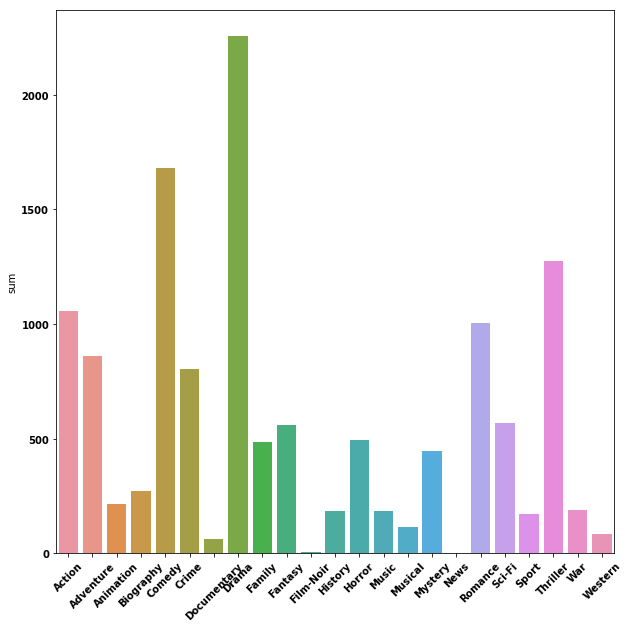

In [85]:
mean_chart = pd.DataFrame(DataFrame_new.groupby(by=['year_range'])['budget'].mean())
mean_chart = pd.DataFrame(DataFrame_new.groupby(by=['year_range'])['budget'].mean())

DataFrame_new = pd.merge(DataFrame_new,mean_chart,left_on='year_range',right_index=True)

DataFrame_new.columns

DataFrame_new['budget_x'].fillna(DataFrame_new['budget_y'],inplace=True)
DataFrame_new['budget_x'].count()

df2_new=DataFrame_new

var_mod=['imdb_score_bin','year_range']
label_encoder_metadata = LabelEncoder()
for i in var_mod:
    df2_new[i] = label_encoder_metadata.fit_transform(df2_new[i])
    
clf= DecisionTreeRegressor()

clf.fit(DataFrame_new[DataFrame_new['gross'].notnull()][['imdb_score_bin','year_range']],DataFrame_new['gross'].dropna(axis=0))

pred = clf.predict(DataFrame_new[DataFrame_new['gross'].isnull()][['imdb_score_bin','year_range']])

DataFrame_new[DataFrame_new['gross'].isnull()][['imdb_score_bin','year_range']].index

j=0
for i in DataFrame_new[DataFrame_new['gross'].isnull()][['imdb_score_bin','year_range']].index :
    DataFrame_new['gross'][i] = pred[j]
    j=j+1

data__DataFrame_genre=DataFrame_new['genres'].str.split('|',expand=True).stack().str.get_dummies().sum(level=0)
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=45)
k=pd.DataFrame(data__DataFrame_genre.sum(),columns=['sum'])
sns.barplot(y='sum',x=k.index,data=k,orient='v')


In [86]:
plt.show()

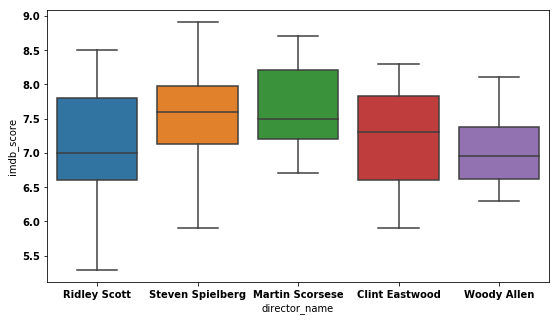

In [87]:
DataFrame_new['age'] = 2017 - DataFrame_new.title_year

k=DataFrame_new.groupby(by='director_name',sort=False).director_facebook_likes.mean()
l=DataFrame_new.groupby(by='director_name',sort=False).imdb_score.sum()
m=DataFrame_new.groupby(by='director_name',sort=False).age.max()
pd.DataFrame(DataFrame_new['director_name'].value_counts())
director_ranking = pd.concat([k,l,m],axis=1)
#Since, Age and imdb score_movie_data are very important factors considered. Because more the sum of scores_data , more will be he populor and older he is , more he is pop. Note: those who are very old may have very low fb_likes becaus of absence of Facebook
#Lets Check which Director has ruled Hollywood?
director_name =list(DataFrame_new['director_name'].value_counts().index[:5])
director_name

pp = DataFrame_new.loc[(DataFrame_new.director_name == director_name[0])|(DataFrame_new.director_name == director_name[1])|(DataFrame_new.director_name == director_name[2])|(DataFrame_new.director_name == director_name[3])|(DataFrame_new.director_name == director_name[4])]

sns.boxplot(x='director_name',y='imdb_score',data=pp)

In [88]:
plt.show()

In [89]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in DataFrame_new.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)          
movie_col_list = DataFrame_new.columns.difference(str_list)  
X=DataFrame_new[movie_col_list]
X.shape

(4411, 21)

In [90]:
X_std = StandardScaler().fit_transform(X)

Lets do Principal compoen analysis to get the important features

<Container object of 20 artists>

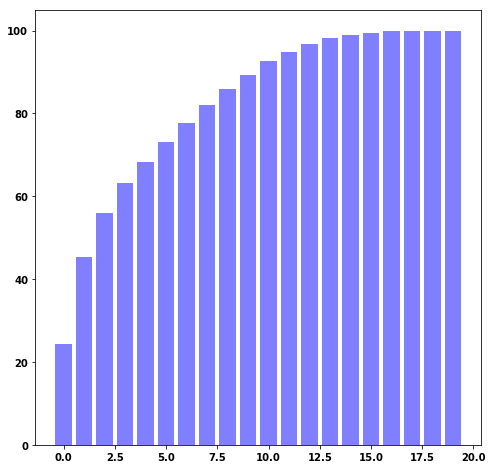

In [91]:
sklearn_pca = sklearnPCA(n_components=20)
Y_sklearn = sklearn_pca.fit_transform(X_std)

cummulative_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cummulative_sum = cummulative_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(20), cummulative_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)

In [92]:
plt.show()

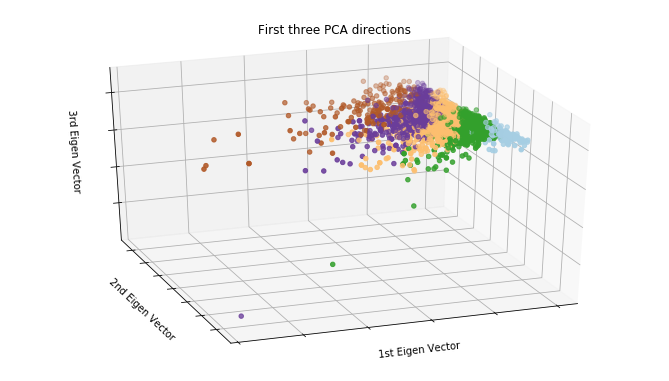

In [93]:
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=DataFrame_new['pc_imdb']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st Eigen Vector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigen Vector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigen Vector")
ax.w_zaxis.set_ticklabels([])
plt.show()

Now we have some more insight on the different genres, let's take a look at different keywords. 
Are there keywords which influence a movie's rating in one way or another? 
What about the revenue? 
Let's answer all these questions

In [94]:
credits_data = load_TMDB_credits_json_data("tmdb_5000_credits.csv")
movies_data = load_TMDB_movie_json_data("tmdb_5000_movies.csv")

In [95]:
del credits_data['title']
df = pd.concat([movies_data, credits_data], axis=1)

In [96]:
df['keywords'] = df['keywords'].apply(pipeline_to_flatten_names)

list_keywords = set()
for s in df['keywords'].str.split('|'):
    list_keywords = set().union(s, list_keywords)
list_keywords = list(list_keywords)
list_keywords.remove('')

We are interested in which keywords occur the most in our dataset. We use the following function to count them.

In [97]:
def word_count(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for list_keywords in df[ref_col].str.split('|'):        
        if type(list_keywords) == float and pd.isnull(list_keywords): continue        
        for s in [s for s in list_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary_words in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [98]:
keyword_occurences, dum = word_count(df, 'keywords', list_keywords)
keyword_occurences[:5]

[[u'woman director', 324],
 [u'independent film', 318],
 [u'duringcreditsstinger', 307],
 [u'based on novel', 197],
 [u'murder', 189]]

In [99]:
def all_keywords_data(dataframe, colonne = 'keywords'):
    PS = nltk.stem.PorterStemmer()
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys = []
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        for t in s.split('|'):
            t = t.lower() ; racine = PS.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
            else:
                keywords_roots[racine] = {t}
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Number of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select

In [100]:
keywords, keywords_roots, keywords_select = all_keywords_data(df, colonne = 'keywords')

Number of keywords in variable 'keywords': 9474


Of course, different movies use different keywords for their movies. 
A problem is, that often a lot of those keywords are the same, although they are communicated in a different form by the different movie producers. 
The function above inventorizes the different keywords using nltk. 
The package identifies the 'roots' of different words and groups the different words according to its root. 
Then, we can replace the words that have a common root with their root. 
In this way, similar words that are phrased differently are assigned a common 'root'.

When executing the function, it also shows the amount of different keywords, 9474 in our case.

In [101]:
icount = 0
for s in keywords_roots.keys():
    if len(keywords_roots[s]) > 1: 
        icount += 1
        if icount < 15: print(icount, keywords_roots[s], len(keywords_roots[s]))

(1, set([u'voyeur', u'voyeurism']), 2)
(2, set([u'music', u'musical']), 2)
(3, set([u'mystic', u'mysticism']), 2)
(4, set([u'travel', u'traveller']), 2)
(5, set([u'beautiful', u'beauty']), 2)
(6, set([u'backpacker', u'backpack']), 2)
(7, set([u'coal mining', u'coal mine']), 2)
(8, set([u'spider', u'spiders']), 2)
(9, set([u'whipping', u'whip']), 2)
(10, set([u'immortality', u'immortal']), 2)
(11, set([u'tree', u'trees']), 2)
(12, set([u'supernatural powers', u'supernatural power']), 2)
(13, set([u'addicted', u'addiction', u'addict']), 3)
(14, set([u'singers', u'singer']), 2)


The function below replaces the different forms of the words by their root.

In [102]:
def replacement_DataFrame_keywords(df, dico_remplacement, roots = False):
    DataFrame_new = df.copy(deep = True)
    for index, row in DataFrame_new.iterrows():
        chaine = row['keywords']
        if pd.isnull(chaine): continue
        nouvelle_liste = []
        for s in chaine.split('|'): 
            clef = PS.stem(s) if roots else s
            if clef in dico_remplacement.keys():
                nouvelle_liste.append(dico_remplacement[clef])
            else:
                nouvelle_liste.append(s)       
        DataFrame_new.set_value(index, 'keywords', '|'.join(nouvelle_liste)) 
    return DataFrame_new

In [103]:
df_keywords_cleaned = replacement_DataFrame_keywords(df, keywords_select,roots = True)

In [104]:
df_keywords_cleaned.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{u'id': 28, u'name': u'Action'}, {u'id': 12, ...",http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{u'name': u'Ingenious Film Partners', u'id': ...",...,162.0,"[{u'iso_639_1': u'en', u'name': u'English'}, {...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{u'name': u'Sam Worthington', u'gender': 2, u...","[{u'name': u'Stephen E. Rivkin', u'gender': 0,..."
1,300000000,"[{u'id': 12, u'name': u'Adventure'}, {u'id': 1...",http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{u'name': u'Walt Disney Pictures', u'id': 2},...",...,169.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{u'name': u'Johnny Depp', u'gender': 2, u'cha...","[{u'name': u'Dariusz Wolski', u'gender': 2, u'..."
2,245000000,"[{u'id': 28, u'name': u'Action'}, {u'id': 12, ...",http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{u'name': u'Columbia Pictures', u'id': 5}, {u...",...,148.0,"[{u'iso_639_1': u'fr', u'name': u'Français'}, ...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{u'name': u'Daniel Craig', u'gender': 2, u'ch...","[{u'name': u'Thomas Newman', u'gender': 2, u'd..."
3,250000000,"[{u'id': 28, u'name': u'Action'}, {u'id': 80, ...",http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{u'name': u'Legendary Pictures', u'id': 923},...",...,165.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{u'name': u'Christian Bale', u'gender': 2, u'...","[{u'name': u'Hans Zimmer', u'gender': 2, u'dep..."
4,260000000,"[{u'id': 28, u'name': u'Action'}, {u'id': 12, ...",http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{u'name': u'Walt Disney Pictures', u'id': 2}]",...,132.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{u'name': u'Taylor Kitsch', u'gender': 2, u'c...","[{u'name': u'Andrew Stanton', u'gender': 2, u'..."


Next, we will use the nltk package to get rid of synonyms. 
The function below take a word as a parameter and returns all of the synonyms of that word according to the nltk package.

In [105]:
def data_synonyms(word):
    lemma = set()
    for ss in wordnet.synsets(word):
        for w in ss.lemma_names():
            #_______________________________
            # We just get the 'nouns':
            index = ss.name().find('.')+1
            if ss.name()[index] == 'n': lemma.add(w.lower().replace('_',' '))
    return lemma   

In [106]:
def check_keyword(mot, key_count, threshold):
    return (False , True)[key_count.get(mot, 0) >= threshold]

In [107]:
keyword_occurences.sort(key = lambda x:x[1], reverse = False)
key_count = dict()
for s in keyword_occurences:
    key_count[s[0]] = s[1]
#__________________________________________________________________________
# Creation of a dictionary_words to replace keywords by higher frequency keywords
replacement_dict = dict()
icount = 0
for index, [mot, nb_apparitions] in enumerate(keyword_occurences):
    if nb_apparitions > 5: continue  # only the keywords that appear less than 5 times
    lemma = data_synonyms(mot)
    if len(lemma) == 0: continue     # case of the plurals
    #_________________________________________________________________
    liste_mots = [(s, key_count[s]) for s in lemma 
                  if check_keyword(s, key_count, key_count[mot])]
    liste_mots.sort(key = lambda x:(x[1],x[0]), reverse = True)    
    if len(liste_mots) <= 1: continue       # no replacement
    if mot == liste_mots[0][0]: continue    # replacement by himself
    icount += 1
    if  icount < 8:
        print('{:<12} -> {:<12} (init: {})'.format(mot, liste_mots[0][0], liste_mots))    
    replacement_dict[mot] = liste_mots[0][0]

print(90*'_'+'\n'+'The replacement concerns {}% of the keywords.'.format(round(len(replacement_dict)/len(keywords)*100,2)))

aggression   -> hostility    (init: [(u'hostility', 12), (u'aggression', 1)])
glass        -> ice          (init: [(u'ice', 5), (u'methamphetamine', 1), (u'glass', 1), (u'crank', 1)])
hole         -> trap         (init: [(u'trap', 3), (u'jam', 1), (u'hole', 1)])
household    -> family       (init: [(u'family', 69), (u'house', 11), (u'home', 4), (u'household', 1)])
artillery    -> gun          (init: [(u'gun', 27), (u'weapon', 16), (u'artillery', 1)])
enchantress  -> witch        (init: [(u'witch', 42), (u'femme fatale', 6), (u'siren', 1), (u'enchantress', 1)])
homoeroticism -> homosexuality (init: [(u'homosexuality', 17), (u'homoeroticism', 1)])
__________________________________________________________________________________________
The replacement concerns 0.0% of the keywords.


In [108]:
print('Keywords that appear both in Keys and Values:'.upper()+'\n'+45*'-')
icount = 0
for s in replacement_dict.values():
    if s in replacement_dict.keys():
        icount += 1
        if icount < 10: print('{:<20} -> {:<20}'.format(s, replacement_dict[s]))

for key, value in replacement_dict.items():
    if value in replacement_dict.keys():
        replacement_dict[key] = replacement_dict[value] 

KEYWORDS THAT APPEAR BOTH IN KEYS AND VALUES:
---------------------------------------------
record               -> book                
bum                  -> tramp               
fatherhood           -> father              
heart                -> spirit              
camp                 -> summer camp         
destruction          -> death               
heart                -> spirit              
pin                  -> fall                
trap                 -> ambush              


In [109]:
keywords_DataFrame_synonyms = replacement_DataFrame_keywords(df_keywords_cleaned, replacement_dict, roots = False)   
keywords, keywords_roots, keywords_select = all_keywords_data(keywords_DataFrame_synonyms, colonne = 'keywords')

Number of keywords in variable 'keywords': 8886


In [110]:
keywords.remove('')
new_keyword_occurences, keywords_count = word_count(keywords_DataFrame_synonyms,'keywords',keywords)
new_keyword_occurences[:5]

[[u'woman director', 324],
 [u'independent film', 318],
 [u'duringcreditsstinger', 307],
 [u'based on novel', 197],
 [u'murder', 197]]

In [111]:
def replacement_df_low_frequency_keywords(df, keyword_occurences):
    DataFrame_new = df.copy(deep = True)
    key_count = dict()
    for s in keyword_occurences: 
        key_count[s[0]] = s[1]    
    for index, row in DataFrame_new.iterrows():
        chaine = row['keywords']
        if pd.isnull(chaine): continue
        nouvelle_liste = []
        for s in chaine.split('|'): 
            if key_count.get(s, 4) > 3: nouvelle_liste.append(s)
        DataFrame_new.set_value(index, 'keywords', '|'.join(nouvelle_liste))
    return DataFrame_new

In [112]:
keywords_DataFrame_occurence = replacement_df_low_frequency_keywords(keywords_DataFrame_synonyms, new_keyword_occurences)
keywords, keywords_roots, keywords_select = all_keywords_data(keywords_DataFrame_occurence, colonne = 'keywords') 

Number of keywords in variable 'keywords': 2110


In [113]:
keywords_DataFrame_occurence.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{u'id': 28, u'name': u'Action'}, {u'id': 12, ...",http://www.avatarmovie.com/,19995,culture clash|future|space colony|society|spac...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{u'name': u'Ingenious Film Partners', u'id': ...",...,162.0,"[{u'iso_639_1': u'en', u'name': u'English'}, {...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{u'name': u'Sam Worthington', u'gender': 2, u...","[{u'name': u'Stephen E. Rivkin', u'gender': 0,..."
1,300000000,"[{u'id': 12, u'name': u'Adventure'}, {u'id': 1...",http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{u'name': u'Walt Disney Pictures', u'id': 2},...",...,169.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{u'name': u'Johnny Depp', u'gender': 2, u'cha...","[{u'name': u'Dariusz Wolski', u'gender': 2, u'..."
2,245000000,"[{u'id': 28, u'name': u'Action'}, {u'id': 12, ...",http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|british...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{u'name': u'Columbia Pictures', u'id': 5}, {u...",...,148.0,"[{u'iso_639_1': u'fr', u'name': u'Français'}, ...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{u'name': u'Daniel Craig', u'gender': 2, u'ch...","[{u'name': u'Thomas Newman', u'gender': 2, u'd..."
3,250000000,"[{u'id': 28, u'name': u'Action'}, {u'id': 80, ...",http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{u'name': u'Legendary Pictures', u'id': 923},...",...,165.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{u'name': u'Christian Bale', u'gender': 2, u'...","[{u'name': u'Hans Zimmer', u'gender': 2, u'dep..."
4,260000000,"[{u'id': 28, u'name': u'Action'}, {u'id': 12, ...",http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{u'name': u'Walt Disney Pictures', u'id': 2}]",...,132.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{u'name': u'Taylor Kitsch', u'gender': 2, u'c...","[{u'name': u'Andrew Stanton', u'gender': 2, u'..."


In [114]:
df_keywords= keywords_DataFrame_occurence
keyword_list = set()
for s in df_keywords['keywords'].str.split('|'):
    keyword_list = set().union(s, keyword_list)
keyword_list = list(keyword_list)
keyword_list.remove('')
keyword_list[:5]

[u'racial segregation',
 u'computer hacker',
 u'chaos',
 u'shark attack',
 u'protest']

In [115]:
DafaFrame_cleaned = df_keywords[['title','vote_average','release_date','runtime','budget','revenue']].reset_index(drop=True)

for keyword in keyword_list:
    DafaFrame_cleaned[keyword] = df['keywords'].str.contains(keyword).apply(lambda x:1 if x else 0)
DafaFrame_cleaned[:5]

DafaFrame_cleaned.head()

,title,vote_average,release_date,runtime,budget,revenue,racial segregation,computer hacker,chaos,shark attack,...,mental institution,mountain climber,american football,ghost,mephisto,atheist,dying and death,mercenary,rural,parole
0,Avatar,7.2,2009-12-10,162.0,237000000,2787965087,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,6.9,2007-05-19,169.0,300000000,961000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,6.3,2015-10-26,148.0,245000000,880674609,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,7.6,2012-07-16,165.0,250000000,1084939099,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,John Carter,6.1,2012-03-07,132.0,260000000,284139100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
mean_per_keyword = pd.DataFrame(keyword_list)

In [117]:
#Mean votes average
Array_Keyword_list = []*len(keyword_list)
for keyword in keyword_list:
    Array_Keyword_list.append(DafaFrame_cleaned.groupby(keyword, as_index=True)['vote_average'].mean())
    
#Mean budget
new_array_genre_data2 = []*len(keyword_list)
for keyword in keyword_list:
    new_array_genre_data2.append(DafaFrame_cleaned.groupby(keyword, as_index=True)['budget'].mean())
    
#Mean revenue
Array_Keyword_list3 = []*len(keyword_list)
for keyword in keyword_list:
    Array_Keyword_list3.append(DafaFrame_cleaned.groupby(keyword, as_index=True)['revenue'].mean())

mean_per_keyword['mean_vote_average']=list(pd.DataFrame(Array_Keyword_list)[1])
mean_per_keyword['mean_budget']=list(pd.DataFrame(new_array_genre_data2)[1])
mean_per_keyword['mean_revenue']=list(pd.DataFrame(Array_Keyword_list3)[1])

In [118]:
mean_per_keyword.sort_values('mean_vote_average', ascending=False).head()

,0,mean_vote_average,mean_budget,mean_revenue
1010,brazilian,7.68,2040000.0,7.247696e+06
1105,jedi,7.65,45337500.0,6.339741e+08
1694,bittersweet,7.60,15100000.0,1.252883e+08
1868,loss of sense of reality,7.60,4200054.5,7.319838e+06
656,fascism,7.58,20450000.0,3.614916e+07


In [119]:
mean_per_keyword.sort_values('mean_budget', ascending=False).head()

,0,mean_vote_average,mean_budget,mean_revenue
1645,swashbuckler,7.080000,2.072000e+08,7.516485e+08
1856,based on fairy tale,6.650000,1.850000e+08,4.537670e+08
1190,hobbit,7.540000,1.844000e+08,9.466358e+08
710,marvel cinematic universe,7.015385,1.823077e+08,7.798770e+08
581,east india trading company,6.950000,1.787500e+08,6.704178e+08


In [120]:
mean_per_keyword.sort_values('mean_revenue', ascending=False).head()

,0,mean_vote_average,mean_budget,mean_revenue
2114,mountain climber,7.300000,1.500000e+08,1.274219e+09
1190,hobbit,7.540000,1.844000e+08,9.466358e+08
980,transformers,6.125000,1.762500e+08,9.402898e+08
979,broom,7.483333,1.508333e+08,9.018436e+08
34,school of witchcraft,7.480000,1.560000e+08,8.869172e+08


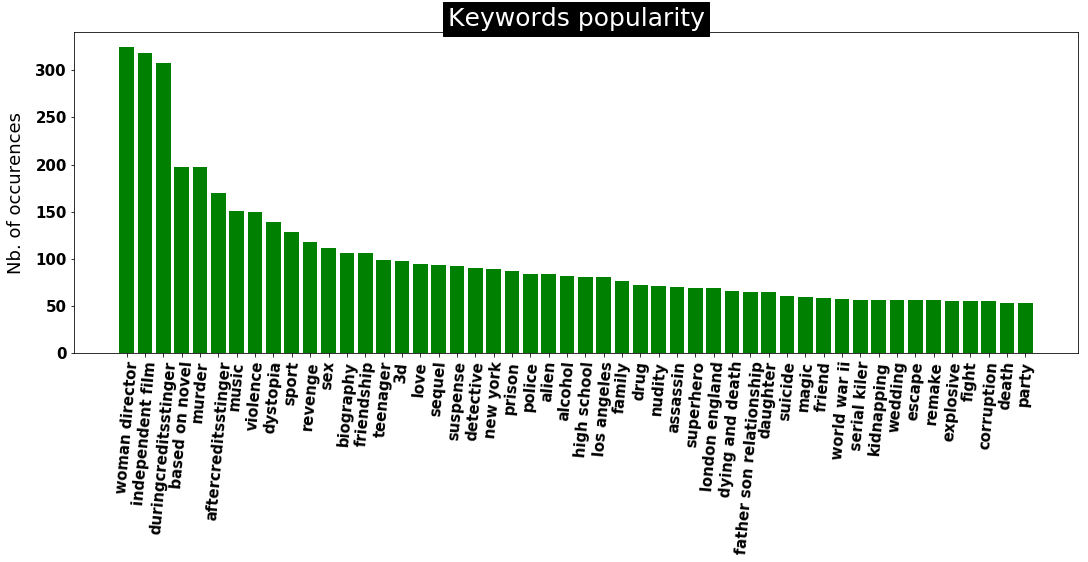

In [121]:
fig = plt.figure(1, figsize=(18,13))
trunc_occurences = new_keyword_occurences[0:50]
# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

In [122]:
Df1 = pd.DataFrame(trunc_occurences)
Df2 = mean_per_keyword
result = Df1.merge(Df2, left_on=0, right_on=0, how='inner')

In [123]:
result = result.rename(columns ={0:'keyword', 1:'occurences'})

In [124]:
result.sort_values('mean_vote_average', ascending= False)

,keyword,occurences,mean_vote_average,mean_budget,mean_revenue
40,serial kiler,57,7.400000,2.000000e+04,9.900000e+04
39,world war ii,58,6.943333,3.953675e+07,9.807107e+07
12,biography,106,6.685981,2.452445e+07,6.053863e+07
34,father son relationship,65,6.666154,4.004557e+07,1.151591e+08
47,corruption,55,6.628333,3.713630e+07,1.025770e+08
33,dying and death,66,6.627273,3.607249e+07,1.455099e+08
45,explosive,55,6.606667,4.732000e+07,1.735899e+08
3,based on novel,197,6.602538,4.532546e+07,1.438100e+08
24,alcohol,82,6.567470,2.185181e+07,7.047892e+07
35,daughter,65,6.537500,3.354488e+07,1.260095e+08


In [125]:
result['mean_vote_average'].mean()

6.353304991835236

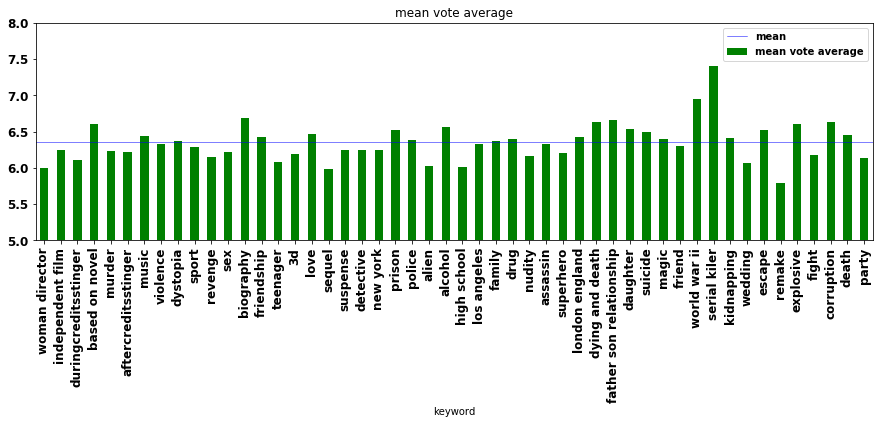

In [126]:
ax = result.plot.bar(x = 'keyword', y='mean_vote_average', title="mean vote average",
                     figsize=(15,4), legend=True, fontsize=12, color='green', label = "mean vote average")
ax.set_ylim(5, 8)
ax.axhline(y=result['mean_vote_average'].mean(),c="blue",linewidth=0.5, label='mean')
ax.legend()
plt.show()

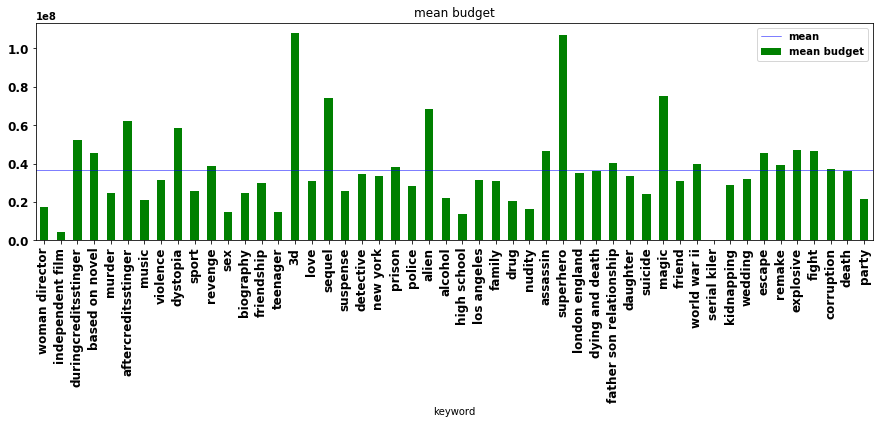

In [127]:
ax = result.plot.bar(x = 'keyword', y='mean_budget', title="mean budget",
                     figsize=(15,4), legend=True, fontsize=12, color='green', label="mean budget")
ax.axhline(y=result['mean_budget'].mean(),c="blue",linewidth=0.5, label='mean')
ax.legend()
plt.show()

So superhero movies do have a high revenue and serial killer movies do not.
Let's take a look at the differences

In [128]:
result.sort_values('mean_budget').head()

,keyword,occurences,mean_vote_average,mean_budget,mean_revenue
40,serial kiler,57,7.400000,2.000000e+04,9.900000e+04
1,independent film,318,6.245912,4.221864e+06,4.611131e+06
25,high school,81,6.017822,1.375000e+07,4.789369e+07
14,teenager,99,6.076238,1.458614e+07,6.009193e+07
11,sex,112,6.213559,1.497524e+07,4.267742e+07


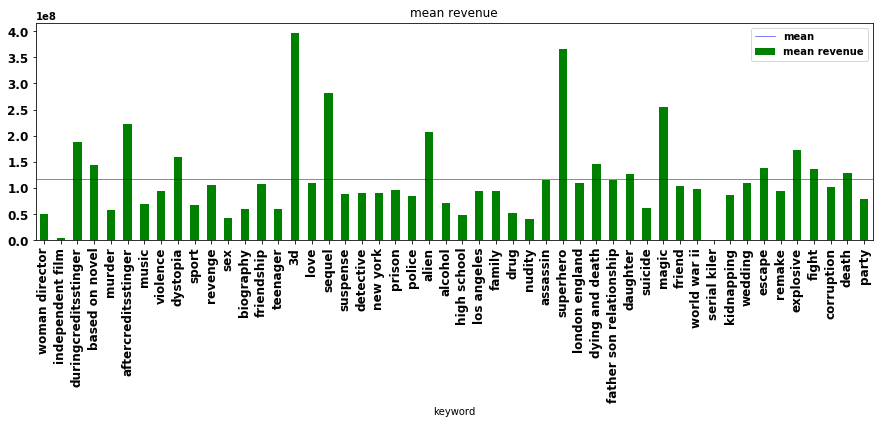

In [129]:
ax = result.plot.bar(x = 'keyword', y='mean_revenue', title="mean revenue",
                     figsize=(15,4), legend=True, fontsize=12, color='green', label="mean revenue")
ax.axhline(y=result['mean_revenue'].mean(),c="blue",linewidth=0.5, label='mean')
ax.legend()
plt.show()

In [130]:
result['profit'] = result['mean_revenue'] - result['mean_budget']
result.head()


,keyword,occurences,mean_vote_average,mean_budget,mean_revenue,profit
0,woman director,324,5.998148,1.712953e+07,4.981613e+07,3.268660e+07
1,independent film,318,6.245912,4.221864e+06,4.611131e+06,3.892670e+05
2,duringcreditsstinger,307,6.102280,5.222324e+07,1.883636e+08,1.361403e+08
3,based on novel,197,6.602538,4.532546e+07,1.438100e+08,9.848457e+07
4,murder,197,6.232971,2.460980e+07,5.843215e+07,3.382235e+07


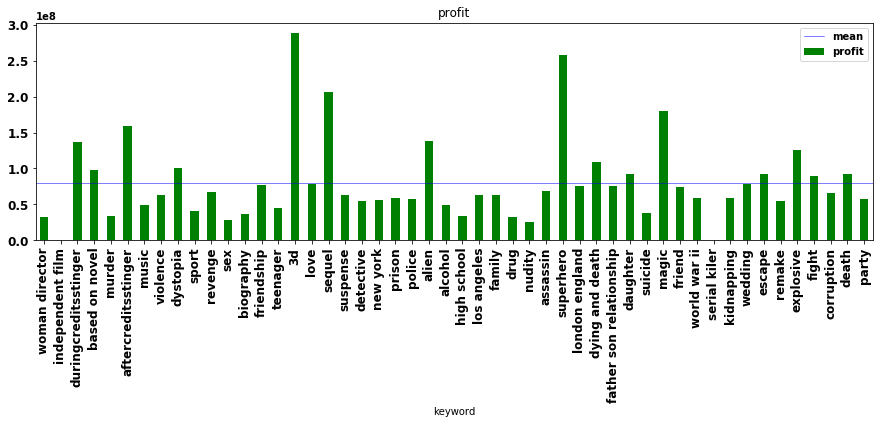

In [131]:
ax = result.plot.bar(x = 'keyword', y='profit', title="profit",
                     figsize=(15,4), legend=True, fontsize=12, color='green', label="profit")
ax.axhline(y=result['profit'].mean(),c="blue",linewidth=0.5, label='mean')
ax.legend()
plt.show()

## Cast analysis

A previous version of this dataset only contained the top three actors per movie. Since we only want to analyze the most important actors of a movie and since the old dataset was a bit more suited to do that, we convert the dataset back to its previous state using Sohier Dane's method.

In [132]:
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews'
                ]

In [133]:
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'data_genres': 'data_genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}

In [134]:
def type_check_normalize(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return type_check_normalize(directors, [0])


def pipeline_to_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def clearning_afterJSON_data(movies_data, credits_data):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies_data.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: type_check_normalize(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: type_check_normalize(x, [0, 'name']))
    tmdb_movies['director_name'] = credits_data['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits_data['cast'].apply(lambda x: type_check_normalize(x, [1, 'name']))
    tmdb_movies['actor_2_name'] = credits_data['cast'].apply(lambda x: type_check_normalize(x, [2, 'name']))
    tmdb_movies['actor_3_name'] = credits_data['cast'].apply(lambda x: type_check_normalize(x, [3, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipeline_to_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipeline_to_flatten_names)
    return tmdb_movies

In [135]:
credits_data = load_TMDB_credits_json_data("tmdb_5000_credits.csv")
movies_data = load_TMDB_movie_json_data("tmdb_5000_movies.csv")
df = clearning_afterJSON_data(movies_data, credits_data)

In [136]:
movie_DataFrame3 = df

In [137]:
columns = ['homepage', 'plot_keywords', 'language', 'overview', 'popularity', 'tagline',
           'original_title', 'num_voted_users', 'country', 'spoken_languages', 'duration',
          'production_companies', 'production_countries', 'status']

In [138]:
df = df.drop(columns, axis=1)

We are interested in the same descriptives for the actors, as we were for keywords and the genres. To do that, we first have to, once again, restructure the dataframe.

We first create a seperate dataframe for each of the three actors, after which we can combine them to get one dataframe with all three types of actor.

In [139]:
genres_data = set()
for s in df['genres'].str.split('|'):
    genres_data = set().union(s, genres_data)
genres_data = list(genres_data)
genres_data.remove('')

In [140]:
DafaFrame_cleaned = df[['actor_1_name', 'vote_average','title_year', 'movie_title', 'gross', 'budget']].reset_index(drop = True)
for genre in genres_data:
    DafaFrame_cleaned[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

DataFrame_Actor2 = df[['actor_2_name', 'vote_average','title_year', 'movie_title', 'gross', 'budget']].reset_index(drop = True)
for genre in genres_data:
    DataFrame_Actor2[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

DataFrame_Actor3 = df[['actor_3_name', 'vote_average','title_year', 'movie_title', 'gross', 'budget']].reset_index(drop = True)
for genre in genres_data:
    DataFrame_Actor3[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

In [141]:
DafaFrame_cleaned = DafaFrame_cleaned.rename(columns={'actor_1_name': 'actor'})
DataFrame_Actor2 = DataFrame_Actor2.rename(columns={'actor_2_name': 'actor'})
DataFrame_Actor3 = DataFrame_Actor3.rename(columns={'actor_3_name': 'actor'})

total = [DafaFrame_cleaned, DataFrame_Actor2, DataFrame_Actor3]
DataFrame_total = pd.concat(total)
DataFrame_total.head()

,actor,vote_average,title_year,movie_title,gross,budget,Mystery,Crime,Drama,Animation,...,Romance,Comedy,Family,Fantasy,Horror,Thriller,Science Fiction,Western,TV Movie,Adventure
0,Zoe Saldana,7.2,2009.0,Avatar,2787965087,237000000,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,Orlando Bloom,6.9,2007.0,Pirates of the Caribbean: At World's End,961000000,300000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,Christoph Waltz,6.3,2015.0,Spectre,880674609,245000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Michael Caine,7.6,2012.0,The Dark Knight Rises,1084939099,250000000,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Lynn Collins,6.1,2012.0,John Carter,284139100,260000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [142]:
DataFrame_actors = DataFrame_total.groupby('actor').mean()
DataFrame_actors.loc[:, 'favored_genre'] = DataFrame_actors[genres_data].idxmax(axis = 1)
DataFrame_actors.drop(genres_data, axis = 1, inplace = True)
DataFrame_actors = DataFrame_actors.reset_index()

In [143]:
DataFrame_total.loc[DataFrame_total['actor'] == "Gary Oldman"].sort_values('vote_average')

,actor,vote_average,title_year,movie_title,gross,budget,Mystery,Crime,Drama,Animation,...,Romance,Comedy,Family,Fantasy,Horror,Thriller,Science Fiction,Western,TV Movie,Adventure
2460,Gary Oldman,4.8,2009.0,The Unborn,76514050,16000000,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
990,Gary Oldman,5.5,1995.0,The Scarlet Letter,10382407,50000000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1132,Gary Oldman,5.6,2011.0,Red Riding Hood,89162162,42000000,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
224,Gary Oldman,5.7,2014.0,RoboCop,242688965,120000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1528,Gary Oldman,5.7,2016.0,Criminal,14708696,31500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013,Gary Oldman,6.1,2015.0,Child 44,3324330,50000000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
387,Gary Oldman,6.2,1997.0,Air Force One,315156409,85000000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2080,Gary Oldman,6.6,2011.0,Tinker Tailor Soldier Spy,0,30000000,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
449,Gary Oldman,6.6,2010.0,The Book of Eli,157107755,80000000,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3934,Gary Oldman,6.6,1996.0,Basquiat,3011195,2962051,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
DataFrame_actors.loc[DataFrame_actors['actor'] == "Gary Oldman"]

,actor,vote_average,title_year,gross,budget,favored_genre
2197,Gary Oldman,6.494118,2005.941176,2.747432e+08,8.102718e+07,Thriller


In [145]:
DataFrame_appearance = DataFrame_total[['actor', 'title_year']].groupby('actor').count()
DataFrame_appearance = DataFrame_appearance.reset_index(drop = True)
DataFrame_selection = DataFrame_appearance['title_year'] > 9
DataFrame_selection = DataFrame_selection.reset_index(drop = True)
best_actors = DataFrame_actors[DataFrame_selection]

In [146]:
best_actors.sort_values('vote_average', ascending=False).head()

,actor,vote_average,title_year,gross,budget,favored_genre
2549,Ian McKellen,7.120000,2005.400000,6.826655e+08,1.435000e+08,Adventure
1931,Emily Watson,6.990000,2007.800000,5.639998e+07,2.180000e+07,Drama
1943,Emma Watson,6.930000,2007.700000,5.875647e+08,1.103000e+08,Adventure
3581,Keira Knightley,6.870000,2008.600000,3.146037e+08,7.795002e+07,Drama
749,Brad Pitt,6.842857,2004.714286,2.281057e+08,7.457143e+07,Thriller


In [147]:
best_actors.sort_values('gross', ascending=False).head()

,actor,vote_average,title_year,gross,budget,favored_genre
2549,Ian McKellen,7.120000,2005.400000,6.826655e+08,1.435000e+08,Adventure
1943,Emma Watson,6.930000,2007.700000,5.875647e+08,1.103000e+08,Adventure
413,Anne Hathaway,6.825000,2010.750000,4.475747e+08,1.021667e+08,Drama
6672,Zoe Saldana,6.554545,2008.545455,3.984685e+08,7.136364e+07,Adventure
3330,Josh Hutcherson,6.250000,2011.300000,3.497807e+08,7.460000e+07,Science Fiction


In [148]:
best_actors.sort_values('budget', ascending=False).head()

,actor,vote_average,title_year,gross,budget,favored_genre
2549,Ian McKellen,7.120,2005.400000,6.826655e+08,1.435000e+08,Adventure
1943,Emma Watson,6.930,2007.700000,5.875647e+08,1.103000e+08,Adventure
413,Anne Hathaway,6.825,2010.750000,4.475747e+08,1.021667e+08,Drama
2778,Jamie Foxx,6.270,2008.700000,2.171006e+08,9.568000e+07,Drama
2468,Helena Bonham Carter,6.575,2006.416667,2.788076e+08,9.091667e+07,Drama


Looks like Sir Ian McKellen has had quite a career. 

He came out on top on all three of our attributes. 

He plays in the movies with the highsest budget, but returns this with the highest average revenues. 

It makes sense that these enormous budgets lead to good movies. 

This is reflected by him having the highest average score on IMDB.

We can now develop several plots to analyze our actors. 

Let us start by plotting the average budget per actor and the average revenue per actor.

In [149]:
genre_data_count = []
for genre in genres_data:
    genre_data_count.append([genre, DafaFrame_cleaned[genre].values.sum()])
genre_data_count.sort(key = lambda x:x[1], reverse = True)
labels_ForGenre, sizes_ForGenre = zip(*genre_data_count)
labels_selected = [n if v > sum(sizes_ForGenre) * 0.01 else '' for n, v in genre_data_count]
reduced_genre_list = labels_ForGenre[:19]
trace=[]
for genre in reduced_genre_list:
    trace.append({'type':'scatter',
                  'mode':'markers',
                  'y':best_actors.loc[best_actors['favored_genre']==genre,'gross'],
                  'x':best_actors.loc[best_actors['favored_genre']==genre,'budget'],
                  'name':genre,
                  'text': best_actors.loc[best_actors['favored_genre']==genre,'actor'],
                  'marker':{'size':10,'opacity':0.7,
                            'line':{'width':1.25,'color':'black'}}})
layout={'title':'Actors favored data_genres',
       'xaxis':{'title':'mean year of activity'},
       'yaxis':{'title':'mean score_movie_data'}}
fig=Figure(data=trace,layout=layout)
pyo.iplot(fig)

We can also use this data to highlight single actors. 

Let us take a look at actors for who we have data of more than 20 movies.

In [150]:
DataFrame_selection = DataFrame_appearance['title_year'] > 20
best_actors = DataFrame_actors[DataFrame_selection]
best_actors

,actor,vote_average,title_year,gross,budget,favored_genre
1179,Christopher Plummer,6.642857,1996.571429,1.001847e+08,3.159524e+07,Drama
4698,Morgan Freeman,6.622727,2002.909091,1.425407e+08,4.509091e+07,Thriller
5448,Robert De Niro,6.277273,2001.409091,9.379787e+07,2.781364e+07,Drama
5678,Samuel L. Jackson,6.275000,2003.083333,1.716997e+08,6.266667e+07,Action
6075,Susan Sarandon,6.095238,2004.571429,3.342379e+07,2.502381e+07,Drama
6595,Woody Harrelson,6.450000,2008.458333,1.816275e+08,4.899167e+07,Comedy


In [151]:
class Trace():
    #____________________
    def __init__(self, color):
        self.mode = 'markers'
        self.name = 'default'
        self.title = 'default title'
        self.marker = dict(color=color, size=110,
                           line=dict(color='white'), opacity=0.7)
        self.r = []
        self.t = []
    #______________________________
    def set_color(self, color):
        self.marker = dict(color = color, size=110,
                           line=dict(color='white'), opacity=0.7)
    #____________________________
    def set_name(self, name):
        self.name = name
    #____________________________
    def set_title(self, title):
        self.na = title
    #___________________________
    def set_actor(self, actor):
        self.actor = actor
    
    #__________________________
    def set_values(self, r, t):
        self.r = np.array(r)
        self.t = np.array(t)

So let's have a look at Morgan Freeman. 

We would like to have a clear overview of all the movies he played in and what his movies scored on IMDB. We can do this using a polar chart.

In [152]:
names =['Morgan Freeman']
movie_DataFrame2 = DafaFrame_cleaned[DafaFrame_cleaned['actor'] == 'Morgan Freeman']
total_count  = 0
years = []
imdb_score = []
genre = []
titles = []
actor = []
for s in genres_data:
    icount = movie_DataFrame2[s].sum()
    #__________________________________________________________________
    # Here, we set the limit to 3 because of a bug in plotly's package
    if icount > 3: 
        total_count += 1
        genre.append(s)
        actor.append(list(movie_DataFrame2[movie_DataFrame2[s] ==1 ]['actor']))
        years.append(list(movie_DataFrame2[movie_DataFrame2[s] == 1]['title_year']))
        imdb_score.append(list(movie_DataFrame2[movie_DataFrame2[s] == 1]['vote_average'])) 
        titles.append(list(movie_DataFrame2[movie_DataFrame2[s] == 1]['movie_title']))
max_y = max([max(s) for s in years])
min_y = min([min(s) for s in years])
year_range = max_y - min_y

years_normed = []
for i in range(total_count):
    years_normed.append( [360/total_count*((an-min_y)/year_range+i) for an in years[i]])

In [153]:
color = ('royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse', 'red')


In [154]:
trace = [Trace(color[i]) for i in range(total_count)]
tr    = []
for i in range(total_count):
    trace[i].set_name(genre[i])
    trace[i].set_title(titles[i])
    trace[i].set_values(np.array(imdb_score[i]),
                        np.array(years_normed[i]))
    tr.append(go.Scatter(r      = trace[i].r,
                         t      = trace[i].t,
                         mode   = trace[i].mode,
                         name   = trace[i].name,
                         marker = trace[i].marker,
#                         text   = ['default title' for j in range(len(trace[i].r))], 
                         hoverinfo = 'all'
                        ))        
layout = go.Layout(
    title='Morgan Freeman',
    font=dict(
        size=15
    ),
    plot_bgcolor='rgb(223, 223, 223)',
    angularaxis=dict(        
        tickcolor='rgb(253,253,253)'
    ),
    hovermode='Closest',
)
fig = go.Figure(data = tr, layout=layout)
pyo.iplot(fig)

## MACHINE LEARNING AND PREDICTION 

In [155]:
movie_DataFrame2 = Early_movie_DataFrame

In [156]:
movie_DataFrame2['log_budget'] = np.log(movie_DataFrame2['budget'])
movie_DataFrame2['log_popularity'] = np.log(movie_DataFrame2['popularity'])
movie_DataFrame2['log_revenue']= np.log(movie_DataFrame2['revenue'])
movie_DataFrame2['log_runtime']= np.log(movie_DataFrame2['runtime'])
movie_DataFrame2['log_vote_average'] = np.log(movie_DataFrame2['vote_average'])
movie_DataFrame2['log_vote_count'] = np.log(movie_DataFrame2['vote_count'])

movie_DataFrame3=movie_DataFrame2[movie_DataFrame2.columns[-6:]]

movie_DataFrame3=movie_DataFrame3[movie_DataFrame3.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
movie_DataFrame3=movie_DataFrame3.dropna(axis=1)

column_order = ['log_budget', 'log_popularity','log_revenue','log_runtime',
              'log_vote_average','log_vote_count']
movie_DataFrame3 = movie_DataFrame3[column_order]

In [157]:
movie_DataFrame3.head()

,log_budget,log_popularity,log_revenue,log_runtime,log_vote_average,log_vote_count
0,19.283571,5.013548,21.748578,5.087596,1.974081,9.375855
1,19.519293,4.935068,20.683485,5.129899,1.931521,8.411833
2,19.316769,4.676344,20.596199,4.997212,1.840550,8.404248
3,19.336971,4.721289,20.804790,5.105945,2.028148,9.116689
4,19.376192,3.782529,19.464974,4.882802,1.808289,7.661056


In [158]:
movie_col_list = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movie_num = movie_DataFrame2[movie_col_list]
movie_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [159]:
movie_DataFrame2.columns

Index([u'title', u'release_date', u'popularity', u'vote_average',
       u'vote_count', u'budget', u'revenue', u'genres', u'keywords', u'cast',
       u'crew', u'tagline', u'runtime', u'production_companies',
       u'production_countries', u'status', u'log_budget', u'log_popularity',
       u'log_revenue', u'log_runtime', u'log_vote_average', u'log_vote_count'],
      dtype='object')

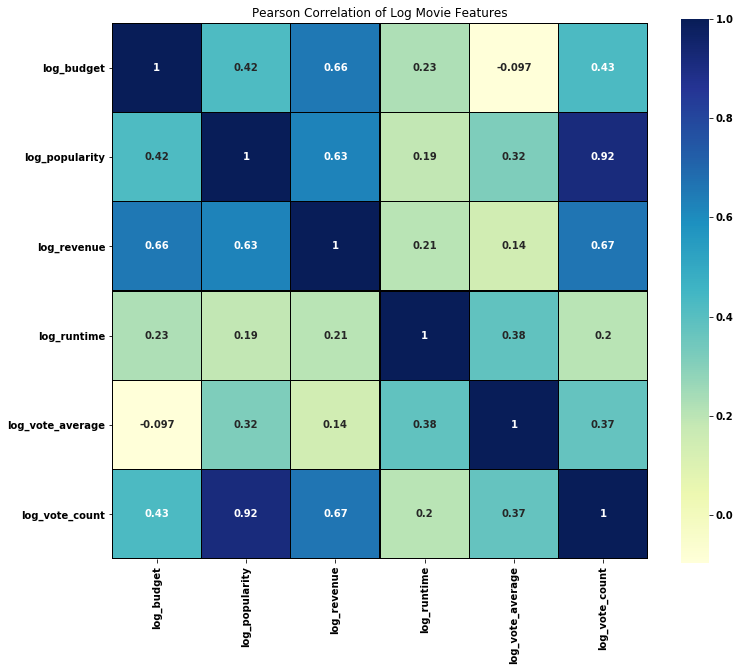

In [160]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Log Movie Features')
sns.heatmap(movie_DataFrame3.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [161]:
plt.show()

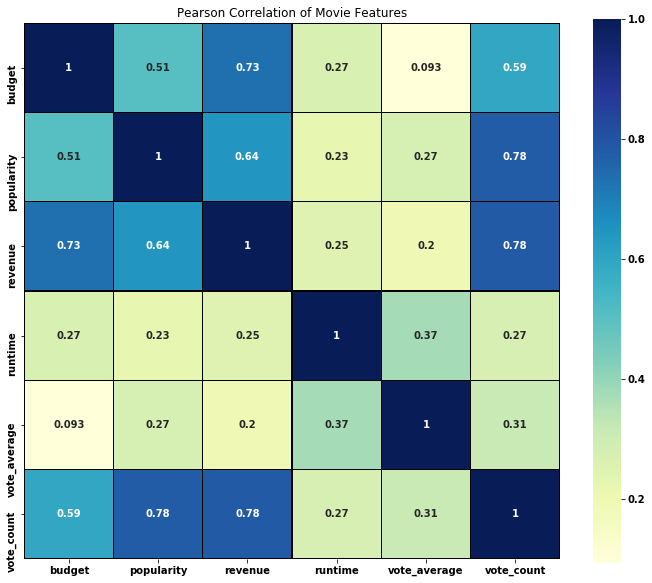

In [162]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(movie_num.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [163]:
from sklearn.model_selection import train_test_split

training_list = ['popularity','runtime','vote_count']
training = movie_num[training_list]
target = movie_num['vote_average']

X = training.values
Y = target.values

X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.33, random_state=42)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils

In [165]:
label_encoder_data = preprocessing.LabelEncoder()
label_encoded_data = label_encoder_data.fit_transform(Y_train)

In [166]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, label_encoded_data.shape

((3218, 3), (3218,), (1585, 3), (1585,), (3218,))

In [167]:
#Logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, label_encoded_data)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, label_encoded_data) * 100, 2)
print('logistic regression:', acc_log)

#SVM
svc = SVC()
svc.fit(X_train, label_encoded_data)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, label_encoded_data)*100,2)
print('Support Vector Machine:', acc_svc)

#Knearestneighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, label_encoded_data)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, label_encoded_data) * 100, 2)
print('KNN:', acc_knn)

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, label_encoded_data)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, label_encoded_data) * 100, 2)
print('Gaussian Naive Bayes:', acc_gaussian)

# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, label_encoded_data)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, label_encoded_data) * 100, 2)
print('Perceptron:', acc_perceptron)

# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, label_encoded_data)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, label_encoded_data) * 100, 2)
print('linear SVC:', acc_linear_svc)

# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, label_encoded_data)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, label_encoded_data) * 100, 2)
print('Stochastic Gradient Descent:', acc_sgd)

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, label_encoded_data)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, label_encoded_data) * 100, 2)
print("Decision Tree:", acc_decision_tree)

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, label_encoded_data)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, label_encoded_data)
acc_random_forest = round(random_forest.score(X_train, label_encoded_data) * 100, 2)
print("Random forest:", acc_random_forest)

('logistic regression:', 6.65)
('Support Vector Machine:', 92.14)
('KNN:', 38.25)
('Gaussian Naive Bayes:', 5.78)
('Perceptron:', 1.21)
('linear SVC:', 1.65)
('Stochastic Gradient Descent:', 4.66)
('Decision Tree:', 100.0)
('Random forest:', 100.0)


In [168]:
movie_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [169]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np
print(__doc__)

Automatically created module for IPython interactive environment


In [170]:
NUM_RANDOM_TRIALS = 4 #30

# Load the dataset
training_list = ['budget','popularity','revenue','runtime','vote_count']
training = movie_num[training_list]
target = movie_num['vote_average']

X = training.values
Y = target.values

X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.33, random_state=42)

label_encoder_data = preprocessing.LabelEncoder()
label_encoded_data = label_encoder_data.fit_transform(Y_train)

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores_data
non_nested_scores = np.zeros(NUM_RANDOM_TRIALS)
nested_scores = np.zeros(NUM_RANDOM_TRIALS)


In [171]:
#for i in range(NUM_RANDOM_TRIALS):
for i in range(1):
    print('Trial Number : ',i)
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_train, label_encoded_data)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train, y=label_encoded_data, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    print('Score of', i, ' : ',nested_score[i])

score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

('Trial Number : ', 0)
('Score of', 0, ' : ', 0.055900621118012424)
Average difference of 0.000621 with std. dev. of 0.001076.


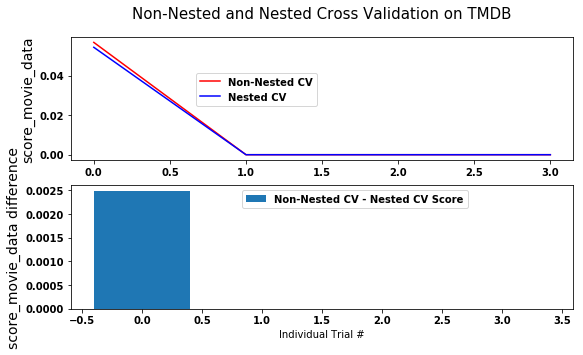

In [172]:
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score_movie_data", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on TMDB",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_RANDOM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score_movie_data difference", fontsize="14")

plt.show()

In [173]:
Y_pred

array([47, 40, 40, ..., 48, 38, 47])

In [174]:
Machine_Learning_Models_List_Pipeline2 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
Machine_Learning_Models_List_Pipeline2.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
0,Support Vector Machines,92.14
1,KNN,38.25
2,Logistic Regression,6.65
4,Naive Bayes,5.78
6,Stochastic Gradient Decent,4.66
7,Linear SVC,1.65
5,Perceptron,1.21


In [175]:
from sklearn.model_selection import train_test_split

training_list = ['popularity','runtime','vote_count']
training = movie_num[training_list]
target = movie_num['vote_average']

X = training.values
Y = target.values

X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.33, random_state=42)

Y_train = pd.cut(Y_train,10, labels=["1", "2","3","4","5","6","7","8","9","10"])

In [176]:

#Logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('logistic regression:', acc_log)

#SVM
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100,2)
print('Support Vector Machine:', acc_svc)

#Knearestneighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print('KNN:', acc_knn)

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print('Gaussian Naive Bayes:', acc_gaussian)

# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print('Perceptron:', acc_perceptron)

# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print('linear SVC:', acc_linear_svc)

# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print('Stochastic Gradient Descent:', acc_sgd)

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Decision Tree:", acc_decision_tree)

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Random forest:", acc_random_forest)

('logistic regression:', 43.51)
('Support Vector Machine:', 93.47)
('KNN:', 63.3)
('Gaussian Naive Bayes:', 29.96)
('Perceptron:', 34.12)
('linear SVC:', 6.25)
('Stochastic Gradient Descent:', 38.04)
('Decision Tree:', 100.0)
('Random forest:', 100.0)


In [177]:
Machine_Learning_Models_List_Pipeline = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
Machine_Learning_Models_List_Pipeline.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
0,Support Vector Machines,93.47
1,KNN,63.30
2,Logistic Regression,43.51
6,Stochastic Gradient Decent,38.04
5,Perceptron,34.12
4,Naive Bayes,29.96
7,Linear SVC,6.25


In [178]:
Machine_Learning_Models_List_Pipeline2.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
0,Support Vector Machines,92.14
1,KNN,38.25
2,Logistic Regression,6.65
4,Naive Bayes,5.78
6,Stochastic Gradient Decent,4.66
7,Linear SVC,1.65
5,Perceptron,1.21


In [179]:
import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
get_ipython().magic(u'matplotlib inline')

In [180]:
movie_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [181]:
correlation_data = []
for i in range(0,6):
    correlation_data.append(movie_num.ix[:,i].corr(movie_num['vote_average']))

In [182]:
correlation_data

[0.093145745348164069,
 0.27395182861902773,
 0.19714966581130883,
 0.37398853534941218,
 1.0,
 0.3129974039957597]

In [183]:
from sklearn.model_selection import train_test_split

training_list = ['popularity','runtime','vote_count']
training = movie_num[training_list]
target = movie_num['vote_average']

X = training.values
Y = target.values

X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.33, random_state=42)

In [184]:
#Revenue
from sklearn.model_selection import train_test_split

training_list = ['budget','popularity','vote_average','runtime','vote_count']
training = movie_num[training_list]
target = movie_num['revenue']

X = training.values
Y = target.values

X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.33, random_state=42)

In [185]:
from sklearn import preprocessing
from sklearn import utils

label_encoder_data = preprocessing.LabelEncoder()
label_encoded_data = label_encoder_data.fit_transform(Y_train)

In [186]:
'''
# TAKES TIME

#Logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, label_encoded_data)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, label_encoded_data) * 100, 2)
print('logistic regression:', acc_log)

#SVM
svc = SVC()
svc.fit(X_train, label_encoded_data)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, label_encoded_data)*100,2)
print('Support Vector Machine:', acc_svc)

#Knearestneighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, label_encoded_data)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, label_encoded_data) * 100, 2)
print('KNN:', acc_knn)

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, label_encoded_data)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, label_encoded_data) * 100, 2)
print('Gaussian Naive Bayes:', acc_gaussian)

# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, label_encoded_data)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, label_encoded_data) * 100, 2)
print('Perceptron:', acc_perceptron)

# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, label_encoded_data)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, label_encoded_data) * 100, 2)
print('linear SVC:', acc_linear_svc)

# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, label_encoded_data)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, label_encoded_data) * 100, 2)
print('Stochastic Gradient Descent:', acc_sgd)

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, label_encoded_data)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, label_encoded_data) * 100, 2)
print("Decision Tree:", acc_decision_tree)

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, label_encoded_data)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, label_encoded_data)
acc_random_forest = round(random_forest.score(X_train, label_encoded_data) * 100, 2)
print("Random forest:", acc_random_forest)
'''

'\n# TAKES TIME\n\n#Logistic regression\n\nlogreg = LogisticRegression()\nlogreg.fit(X_train, label_encoded_data)\nY_pred = logreg.predict(X_test)\nacc_log = round(logreg.score(X_train, label_encoded_data) * 100, 2)\nprint(\'logistic regression:\', acc_log)\n\n#SVM\nsvc = SVC()\nsvc.fit(X_train, label_encoded_data)\nY_pred = svc.predict(X_test)\nacc_svc = round(svc.score(X_train, label_encoded_data)*100,2)\nprint(\'Support Vector Machine:\', acc_svc)\n\n#Knearestneighbors\n\nknn = KNeighborsClassifier(n_neighbors = 3)\nknn.fit(X_train, label_encoded_data)\nY_pred = knn.predict(X_test)\nacc_knn = round(knn.score(X_train, label_encoded_data) * 100, 2)\nprint(\'KNN:\', acc_knn)\n\n# Gaussian Naive Bayes\n\ngaussian = GaussianNB()\ngaussian.fit(X_train, label_encoded_data)\nY_pred = gaussian.predict(X_test)\nacc_gaussian = round(gaussian.score(X_train, label_encoded_data) * 100, 2)\nprint(\'Gaussian Naive Bayes:\', acc_gaussian)\n\n# Perceptron\n\nperceptron = Perceptron()\nperceptron.fit(

In [187]:
Machine_Learning_Models_List_Pipeline2 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
Machine_Learning_Models_List_Pipeline2.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
0,Support Vector Machines,93.47
1,KNN,63.30
2,Logistic Regression,43.51
6,Stochastic Gradient Decent,38.04
5,Perceptron,34.12
4,Naive Bayes,29.96
7,Linear SVC,6.25


# Comparing different regression techniques

We want to compare a few regression techniques to help us in making predictions. We'll use linear regression and random forest, as treated in the lectures.
We start by recreating our numerical data frame.

In [188]:
from sklearn.model_selection import train_test_split

training_list = ['budget','popularity','revenue','runtime','vote_count']
training = movie_num[training_list]
target = movie_num['vote_average']

X = training.values
Y = target.values

X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.33, random_state=42)

In [191]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, Y_train) * 100, 2)
print("Decision Tree:", acc_decision_tree)

#Linear regression
from sklearn import linear_model
from sklearn import metrics

lin_regression = linear_model.LinearRegression()
lin_regression.fit(X_train, Y_train)
Y_pred = lin_regression.predict(X_test)
acc_linReg = round(lin_regression.score(X_train, Y_train)*100,2)
print("Linear Regression:", acc_linReg)

('Decision Tree:', 100.0)
('Linear Regression:', 20.34)


In [194]:
movie_col_list = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movie_num = movie_DataFrame2[movie_col_list]
movie_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [195]:
correlation_data = []
for i in range(0,6):
    correlation_data.append(movie_num.ix[:,i].corr(movie_num['vote_average']))
correlation_data

[0.093145745348164069,
 0.27395182861902773,
 0.19714966581130883,
 0.37398853534941218,
 1.0,
 0.3129974039957597]

In [196]:
training_list = ['popularity','runtime','vote_count']
training = movie_num[training_list]
target = movie_num['vote_average']

In [197]:
X = training.values
y = target.values

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

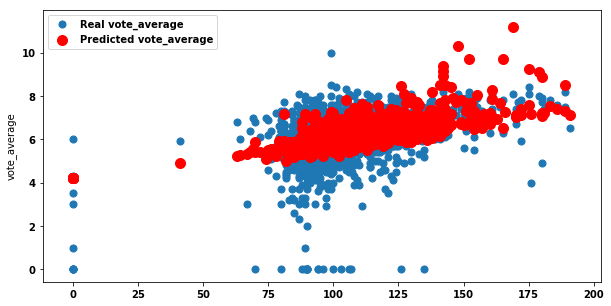

In [199]:
f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real vote_average");
plt.scatter(X_test[:,1], Y_pred,s=100, c='r',label="Predicted vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

In [200]:
training_list = ['budget','popularity','revenue','runtime','vote_count']
training = movie_num[training_list]
target = movie_num['vote_average']

In [201]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred_lr = regr.predict(X_test)

In [202]:
X = training.values
y = target.values

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [204]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lr = regr.predict(X_test)

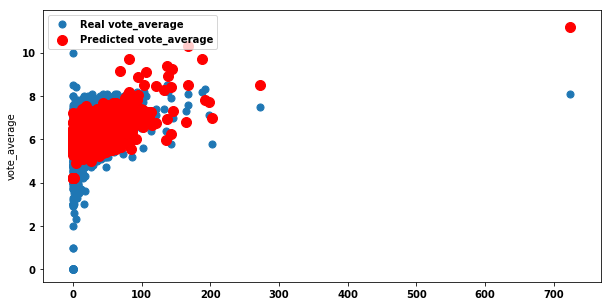

In [205]:
f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real vote_average");
plt.scatter(X_test[:,1], y_pred_lr,s=100, c='r',label="Predicted vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);


In [206]:
from sklearn.ensemble import RandomForestRegressor
# Create linear regression object
rf = RandomForestRegressor(1)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_rf = rf.predict(X_test)

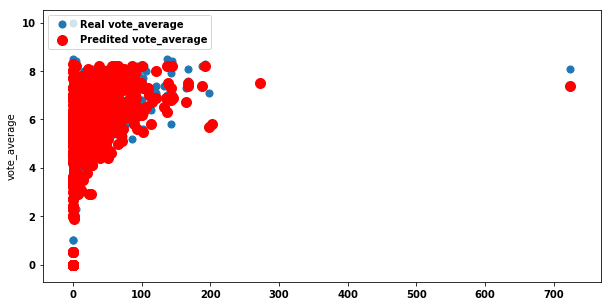

In [207]:
f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real vote_average");
plt.scatter(X_test[:,1], y_pred_rf,s=100, c='r',label="Predited vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

In [208]:
from sklearn.metrics import mean_squared_error

error_lr = mean_squared_error(y_test,y_pred_lr)
error_rf = mean_squared_error(y_test,y_pred_rf)

print(error_lr)
print(error_rf)

1.08038126837
1.37682649842


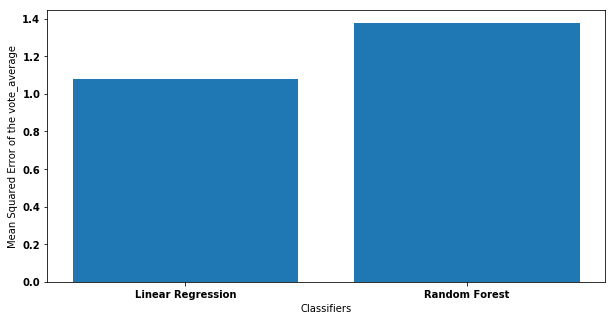

In [216]:
f = plt.figure(figsize=(10,5))
plt.bar(range(2),[error_lr,error_rf], yerr=np.std(0))
plt.xlabel("Classifiers");
plt.ylabel("Mean Squared Error of the vote_average");
plt.xticks(range(2),['Linear Regression','Random Forest'])
plt.legend(loc=2);

In [210]:
np.std(error_rf)

0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a396df9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a3a1d05d0>]], dtype=object)

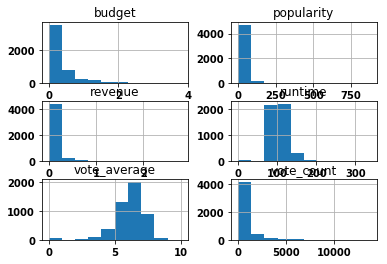

In [211]:
import matplotlib.pyplot 
movie_num.hist()

# SENTIMENT ANALYSIS USING LSTM

In [213]:
import numpy as np
import pandas as pd

from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM
np.random.seed(0)

In [214]:
if __name__ == "__main__":

    #load data
    DataFrame_train_data = pd.read_csv('./data/train.tsv', sep='\t', header=0)
    DataFrame_test_data = pd.read_csv('./data/test.tsv', sep='\t', header=0)

    DataFrame_raw_train_docs = DataFrame_train_data['Phrase'].values
    DataFrame_raw_test_docs = DataFrame_test_data['Phrase'].values
    train_sentiment = DataFrame_train_data['Sentiment'].values
    data_labelling_len = len(np.unique(train_sentiment))

    #text pre-processing
    stop_words = set(stopwords.words('english'))
    stop_words.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])
    stemmer = SnowballStemmer('english')

    ###print 'pre-processing train docs...'
    list_processed_docs_train = []
    for doc in DataFrame_raw_train_docs:
       all_tokens = word_tokenize(doc)
       all_filtered_words = [word for word in all_tokens if word not in stop_words]
       after_stemming_of_words = [stemmer.stem(word) for word in all_filtered_words]
       list_processed_docs_train.append(after_stemming_of_words)
   
    ###print 'pre-processing test docs...'
    processed_docs_test = []
    for doc in DataFrame_raw_test_docs:
       all_tokens = word_tokenize(doc)
       all_filtered_words = [word for word in all_tokens if word not in stop_words]
       after_stemming_of_words = [stemmer.stem(word) for word in all_filtered_words]
       processed_docs_test.append(after_stemming_of_words)

    processed_docs_all = np.concatenate((list_processed_docs_train, processed_docs_test), axis=0)

    dictionary_words = corpora.Dictionary(processed_docs_all)
    dictionary_size = len(dictionary_words.keys())
    ###print 'dictionary_words size: ', dictionary_size 
    #dictionary_words.save('dictionary_words.dict')
    #corpus = [dictionary_words.doc2bow(doc) for doc in processed_docs]

    ###print 'converting to token ids...'
    word_id_train, word_id_len = [], []
    for doc in list_processed_docs_train:
        word_ids = [dictionary_words.token2id[word] for word in doc]
        word_id_train.append(word_ids)
        word_id_len.append(len(word_ids))

    word_id_test, word_ids = [], []
    for doc in processed_docs_test:
        word_ids = [dictionary_words.token2id[word] for word in doc]
        word_id_test.append(word_ids)
        word_id_len.append(len(word_ids))
 
    sequence_length = np.round((np.mean(word_id_len) + 2*np.std(word_id_len))).astype(int)

    #pad sequences
    word_id_train = sequence.pad_sequences(np.array(word_id_train), maxlen=sequence_length)
    word_id_test = sequence.pad_sequences(np.array(word_id_test), maxlen=sequence_length)
    y_train_enc = np_utils.to_categorical(train_sentiment, data_labelling_len)

    #LSTM
    ###print 'fitting LSTM ...'
    model = Sequential()
    model.add(Embedding(dictionary_size, 128, dropout=0.2))
    model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))
    model.add(Dense(data_labelling_len))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(word_id_train, y_train_enc, nb_epoch=1, batch_size=256, verbose=1)

    test_pred = model.predict_classes(word_id_test)

    #Output a csv file to check output
    DataFrame_test_data['Sentiment'] = test_pred.reshape(-1,1) 
    header = ['PhraseId', 'Sentiment']
    DataFrame_test_data.to_csv('./lstm_sentiment.csv', columns=header, index=False, header=True)

Epoch 1/1
156060/156060 [==============================] - 112s 718us/step - loss: 0.9981 - acc: 0.5982


In [215]:
DataFrame_test_data

,PhraseId,SentenceId,Phrase,Sentiment
0,156061,8545,An intermittently pleasing but mostly routine ...,3
1,156062,8545,An intermittently pleasing but mostly routine ...,3
2,156063,8545,An,2
3,156064,8545,intermittently pleasing but mostly routine effort,3
4,156065,8545,intermittently pleasing but mostly routine,3
5,156066,8545,intermittently pleasing but,3
6,156067,8545,intermittently pleasing,3
7,156068,8545,intermittently,2
8,156069,8545,pleasing,3
9,156070,8545,but,2


## THE END [Nikesh-nrs113, Anirudh-ab1721]